In [ ]:
import pandas as pd
import os


new_test = pd.read_csv(r'Car_Rira_11 gh 562 - ir 60_Data_01_01_2025, 12_54_00_to_05_31_2025, 12_54_00.csv')
print(len(new_test))

folder = 'new_content'
if not os.path.exists(folder):
    os.makedirs(folder)
    
def is_monotonic_increasing_with_stability(time_series, fuel_series):
    # Time should be strictly increasing, but fuel consumption can stay constant or increase
    return (time_series.is_monotonic_increasing) and all(fuel_series.diff().ge(0) | fuel_series.diff().eq(0))

grouped = new_test.groupby('trip')
# Iterate through each trip group
for trip, group in grouped:
    if len(group) < 750:
        continue
    if not is_monotonic_increasing_with_stability(group['time'], group['Trip_fuel_consumption']):
        # Split the group into two or more, based on where time or fuel consumption decreases or jumps
        split_groups = []
        current_group = []
        last_time = None
        last_fuel = None

        for index, row in group.iterrows():
            # Ensure time is strictly increasing and fuel consumption doesn't decrease
            if last_time is None or (row['time'] >= last_time and (row['Trip_fuel_consumption'] >= last_fuel or row['Trip_fuel_consumption'] == last_fuel)):
                current_group.append(row)
            else:
                # When either time or fuel consumption decreases or jumps, store the current group and start a new one
                split_groups.append(pd.DataFrame(current_group))
                current_group = [row]
            last_time = row['time']
            last_fuel = row['Trip_fuel_consumption']

        # Add the last group
        split_groups.append(pd.DataFrame(current_group))

        # Save each split group as a new CSV file
        for i, split_group in enumerate(split_groups):
            filename = f"{folder}/trip_{trip}_part_{i+1}_6.csv"
            split_group.to_csv(filename, index=False)

    else:
        # If both time and fuel consumption are monotonic, save the group as a CSV file
        filename = f"{folder}/trip_{trip}.csv"
        group.to_csv(filename, index=False)
        
folder_path = r"new_content"
s = 0

# # Loop through each file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):  # Check if the file is a CSV
        file_path = os.path.join(folder_path, file_name)
        try:
            # Read the CSV file into a DataFrame
            df = pd.read_csv(file_path)
            s += len(df)

            # Check the number of rows in the DataFrame
            if len(df) < 750:
                if '11' not in file_name:
                    print(f"Deleting {file_name} (rows: {len(df)})")
                    
                os.remove(file_path)  # Delete the file
                s -= len(df)
            else:
                # print(f"Keeping {file_name} (rows: {len(df)})")
                bb=1
        except Exception as e:
            print(f"Error processing {file_name}: {e}")
print(s)

C:\Users\Rajabali\AppData\Local\Temp\ipykernel_664\2961991696.py:5: DtypeWarning: Columns (5,34,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  new_test = pd.read_csv(r'Car_Rira_11 gh 562 - ir 60_Data_01_01_2025, 12_54_00_to_05_31_2025, 12_54_00.csv')


389469
Deleting trip_103.0_part_1_6.csv (rows: 9)
Deleting trip_103.0_part_2_6.csv (rows: 6)
Deleting trip_103.0_part_3_6.csv (rows: 6)
Deleting trip_103.0_part_4_6.csv (rows: 6)
Deleting trip_103.0_part_5_6.csv (rows: 6)
Deleting trip_103.0_part_6_6.csv (rows: 6)
Deleting trip_103.0_part_7_6.csv (rows: 6)
Deleting trip_103.0_part_8_6.csv (rows: 6)
Deleting trip_103.0_part_9_6.csv (rows: 6)
Deleting trip_104.0_part_1_6.csv (rows: 27)
Deleting trip_104.0_part_2_6.csv (rows: 6)
Deleting trip_108.0_part_2_6.csv (rows: 3)
Deleting trip_121.0_part_2_6.csv (rows: 161)
Deleting trip_130.0_part_2_6.csv (rows: 30)
Deleting trip_183.0_part_1_6.csv (rows: 360)
Deleting trip_187.0_part_3_6.csv (rows: 9)
Deleting trip_189.0_part_2_6.csv (rows: 156)
Deleting trip_191.0_part_1_6.csv (rows: 33)
Deleting trip_191.0_part_2_6.csv (rows: 6)
Deleting trip_191.0_part_4_6.csv (rows: 23)
Deleting trip_199.0_part_1_6.csv (rows: 363)
Deleting trip_199.0_part_2_6.csv (rows: 369)
Deleting trip_199.0_part_3_6.csv 

In [1]:
import os
import pandas as pd

folder = 'train'
total_milage = 0
total_time = 0


for file_name in os.listdir(folder):
    if file_name.endswith('.csv'):  # Check if the file is a CSV
        file_path = os.path.join(folder, file_name)
        df = pd.read_csv(file_path)
        milage = df['Cumulative_mileage'].iloc[-1] - df['Cumulative_mileage'].iloc[0]
        time = df['time'].iloc[-1] - df['time'].iloc[0]
        total_milage += milage
        total_time += time
print(f'train data milage: {total_milage}')
print(f'train total time: {total_time/3600000}h')
print()

folder = 'test'
total_milage = 0
total_time = 0


for file_name in os.listdir(folder):
    if file_name.endswith('.csv'):  # Check if the file is a CSV
        file_path = os.path.join(folder, file_name)
        df = pd.read_csv(file_path)
        milage = df['Cumulative_mileage'].iloc[-1] - df['Cumulative_mileage'].iloc[0]
        time = df['time'].iloc[-1] - df['time'].iloc[0]
        total_milage += milage
        total_time += time
print(f'test data milage: {total_milage}')
print(f'test total time: {total_time/3600000}h')
print()

train data milage: 116.125
train total time: 2.8008255555555555h

test data milage: 756.3189999999977
test total time: 23.34078472222222h



In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
import joblib
from torch.optim.lr_scheduler import StepLR
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
import os


torch.manual_seed(42)

# Features and target
features = [
            'Current_gear_shift_position_(Current_gear)',
            'Acceleration2',
            'Acceleration1',
            'Modified_Speed',
            'new_slope'
]
target = 'Momentary fuel consumption2'

X_all = None
y_all = None

folder_path = r"C:\Users\Rajabali\Desktop\FCP\CNN\train"
for filename in sorted(os.listdir(folder_path)):
    df = pd.read_csv(os.path.join(folder_path, filename), low_memory=False)
    df['Modified_Speed'] = np.power(df['Vehicle_Speed'], 1)
    if 'Acceleration2' not in df.columns or 'Acceleration1' not in df.columns:
        df['Current_gear_shift_position_(Current_gear)'] = df['Current_gear_shift_position_(Current_gear)'].replace({13: 0, 14: 1})
        df['Acceleration1'] = df['Vehicle_Speed'].diff().fillna(0)
        df['Acceleration2'] = df['Vehicle_Speed'].diff().shift(-1).fillna(0)
        df['Momentary fuel consumption2'] = df['Trip_fuel_consumption'].diff().shift(-1).fillna(0)
    df['Momentary fuel consumption2'] = np.log1p(df['Momentary fuel consumption2'])
    X = df[features].values
    # X_ = df[features]
    y = df[target].values
    
    if X_all is None:
        X_all = X
        y_all = y
    else:
        X_all = np.concatenate([X_all, X], axis=0)
        y_all = np.concatenate([y_all, y], axis=0)


scaler_X = RobustScaler()
scaler_y = RobustScaler()
X_all = scaler_X.fit_transform(X_all)
y_all = scaler_y.fit_transform(y_all.reshape(-1, 1))


sequence_length = 16
X_seq = []
y_seq = []

cum_l = 0
for filename in sorted(os.listdir(folder_path)):
    df = pd.read_csv(os.path.join(folder_path, filename), low_memory=False)
    
    X = X_all[cum_l:cum_l+len(df), :]
    y = y_all[cum_l:cum_l+len(df)]
    cum_l += len(df)
    
    
    for i in range(len(X) - sequence_length):
        X_seq.append(X[i:i + sequence_length])
        if sequence_length%2 != 0:
            y_seq.append(y[i + sequence_length//2])
        else:
            y_seq.append((y[i + sequence_length//2] + y[i - 1 + sequence_length//2])/2)

X_seq = torch.tensor(X_seq, dtype=torch.float32)  # shape: (samples, seq_len, features)
y_seq = torch.tensor(y_seq, dtype=torch.float32).view(-1, 1)


# -------------------- Train/Test Split --------------------
X_train_tensor, X_test_tensor, y_train_tensor, y_test_tensor = train_test_split(
    X_seq, y_seq, test_size=0.2, random_state=42
)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

X_train_tensor = X_train_tensor.to(device)
X_test_tensor = X_test_tensor.to(device)
y_train_tensor = y_train_tensor.to(device)
y_test_tensor = y_test_tensor.to(device)

# Datasetها
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# DataLoaderها
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


class Conv_1d_bn_relu(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride, padding, sequence_length):
        super().__init__()
        self.layer = nn.Sequential(
            nn.Conv1d(in_channels=in_channels,
                      out_channels=out_channels,
                      kernel_size=kernel_size,
                      stride=stride,
                      padding=padding),
            nn.LayerNorm([out_channels, sequence_length]),
            nn.ReLU()
        )
        
    def forward(self, x):
        return self.layer(x)


# -------------------- Define CNN Model --------------------
class FuelConsumptionCNN(nn.Module):
    def __init__(self, input_features):
        super(FuelConsumptionCNN, self).__init__()
        self.conv1 = Conv_1d_bn_relu(in_channels=input_features,
                                     out_channels=64,
                                     kernel_size=2,
                                     stride=1,
                                     padding=0,
                                     sequence_length=15)
        self.pool1 = nn.MaxPool1d(kernel_size=2)
        
        
        self.conv2 = Conv_1d_bn_relu(in_channels=64,
                                     out_channels=64,
                                     kernel_size=2,
                                     stride=1,
                                     padding=0,
                                     sequence_length=6)
        self.pool2 = nn.MaxPool1d(kernel_size=2)
        
        
        self.conv3 = Conv_1d_bn_relu(in_channels=64,
                                     out_channels=128,
                                     kernel_size=2,
                                     stride=1,
                                     padding=0,
                                     sequence_length=2)
        self.pool3 = nn.MaxPool1d(kernel_size=2)
        
        
        self.fc1 = nn.Linear(128, 64)
        self.bn3 = nn.LayerNorm(64)
        self.relu3 = nn.ReLU()
        
        self.fc2 = nn.Linear(64, 32)
        self.bn4 = nn.LayerNorm(32)
        self.relu4 = nn.ReLU()
        
        self.fc3 = nn.Linear(32, 1)
        
        
        
        self.dr1 = nn.Dropout(p=0.1)
        self.dr2 = nn.Dropout(p=0.1)
        self.dr3 = nn.Dropout(p=0.0)
        self.dr4 = nn.Dropout(p=0.0)
        self.dr5 = nn.Dropout(p=0.0)

    def forward(self, x):
        # x shape: (batch, seq_len, features) → permute for Conv1D
        x = x.permute(0, 2, 1)  # → (batch, features, seq_len
        
        x = self.dr1(self.pool1(self.conv1(x)))
        x = self.dr2(self.pool2(self.conv2(x)))
        x = self.dr3(self.pool3(self.conv3(x)))

        x = x.view(x.size(0), -1)
        
        x = self.bn3(self.fc1(x))
        x = self.dr4(self.relu3(x))
        
        x = self.dr5(self.relu4(self.bn4(self.fc2(x))))
        
        x = self.fc3(x)
        return x

# -------------------- Initialize --------------------
input_features = X_train_tensor.shape[2]
model = FuelConsumptionCNN(input_features).to(device)
# criterion = nn.SmoothL1Loss()
criterion = nn.MSELoss()

optimizer = optim.Adam(model.parameters(), lr=0.003)
scheduler = StepLR(optimizer, step_size=5, gamma=0.95)

# -------------------- Train --------------------
epochs = 500
for epoch in range(epochs):
    model.train()
    for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
    scheduler.step()

    if (epoch + 1) % 5 == 0:
        current_lr = optimizer.param_groups[0]['lr']
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.6f}, LR: {current_lr:.6f}')
        # if loss.item() < 0.02:
        #     break

# -------------------- Evaluation --------------------
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)

comparison_df = pd.DataFrame({
    'Actual Fuel Consumption': y_test_tensor.cpu().numpy().flatten(),
    'Predicted Fuel Consumption': y_pred.cpu().numpy().flatten()
})

print(comparison_df.head())

# -------------------- Save Model --------------------
torch.save(model.state_dict(), 'fuel_consumption_cnn_model.pth')
print("Model saved as 'fuel_consumption_cnn_model.pth'")

folder = 'test_results\folder_name'

Using device: cuda
Epoch [5/500], Loss: 1.664641, LR: 0.002850
Epoch [10/500], Loss: 2.033754, LR: 0.002707
Epoch [15/500], Loss: 1.319177, LR: 0.002572
Epoch [20/500], Loss: 1.037587, LR: 0.002444
Epoch [25/500], Loss: 1.136099, LR: 0.002321
Epoch [30/500], Loss: 0.882928, LR: 0.002205
Epoch [35/500], Loss: 0.590865, LR: 0.002095
Epoch [40/500], Loss: 0.662085, LR: 0.001990
Epoch [45/500], Loss: 0.489461, LR: 0.001891
Epoch [50/500], Loss: 0.344639, LR: 0.001796
Epoch [55/500], Loss: 0.387421, LR: 0.001706
Epoch [60/500], Loss: 0.269301, LR: 0.001621
Epoch [65/500], Loss: 0.467996, LR: 0.001540
Epoch [70/500], Loss: 0.708732, LR: 0.001463
Epoch [75/500], Loss: 0.180072, LR: 0.001390
Epoch [80/500], Loss: 0.203997, LR: 0.001320
Epoch [85/500], Loss: 0.199483, LR: 0.001254
Epoch [90/500], Loss: 0.779160, LR: 0.001192
Epoch [95/500], Loss: 0.588596, LR: 0.001132
Epoch [100/500], Loss: 0.637989, LR: 0.001075
Epoch [105/500], Loss: 0.239381, LR: 0.001022
Epoch [110/500], Loss: 0.189238, LR

🔄 Processing: trip_100.0_part_1_6.csv
🔄 Processing: trip_101.0_part_1_6.csv
🔄 Processing: trip_102.0_part_1_6.csv
🔄 Processing: trip_103.0_part_1_6.csv
🔄 Processing: trip_108.0_part_1_6.csv
🔄 Processing: trip_109.0_part_1_6.csv
🔄 Processing: trip_11.0_part_1_6.csv
🔄 Processing: trip_120.0_part_1_6.csv
🔄 Processing: trip_144.0_part_1_6.csv
🔄 Processing: trip_16.0_part_6_6.csv
🔄 Processing: trip_17.0_part_1_6.csv
🔄 Processing: trip_178.0_part_7_6.csv
🔄 Processing: trip_179.0_part_1_6.csv
🔄 Processing: trip_181.0_part_6_6.csv
🔄 Processing: trip_182.0_part_2_6.csv
🔄 Processing: trip_189.0_part_1_6.csv
🔄 Processing: trip_19.0_part_3_6.csv
🔄 Processing: trip_191.0_part_1_6.csv
🔄 Processing: trip_193.0_part_1_6.csv
🔄 Processing: trip_20.0_part_1_6.csv
🔄 Processing: trip_3.0_part_1_6.csv
🔄 Processing: trip_32.0_part_1_6.csv
🔄 Processing: trip_35.0_part_1_6.csv
🔄 Processing: trip_36.0_part_2_6.csv
🔄 Processing: trip_4.0_part_1_6.csv
🔄 Processing: trip_40.0_part_1_6.csv
🔄 Processing: trip_49.0_p

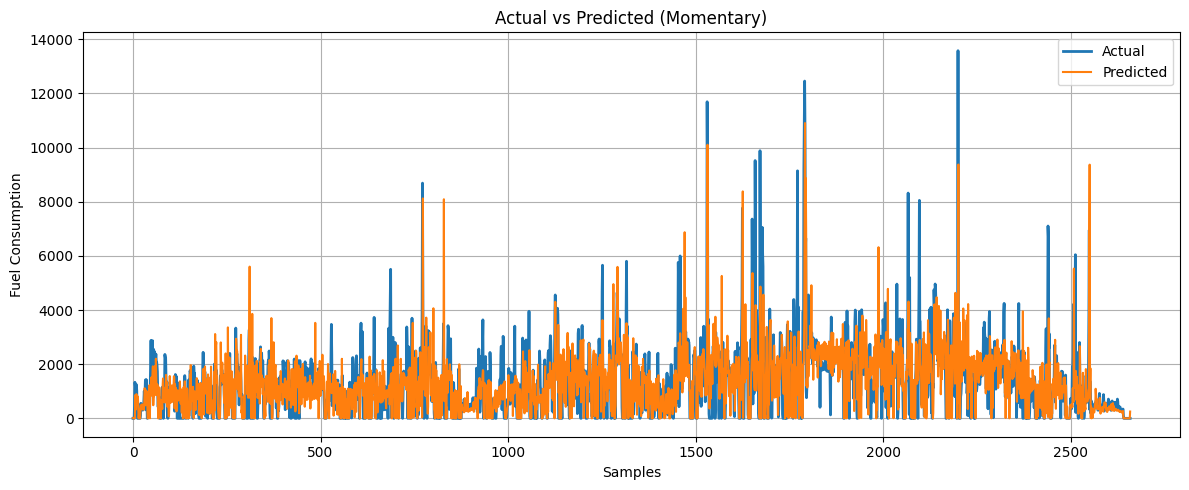

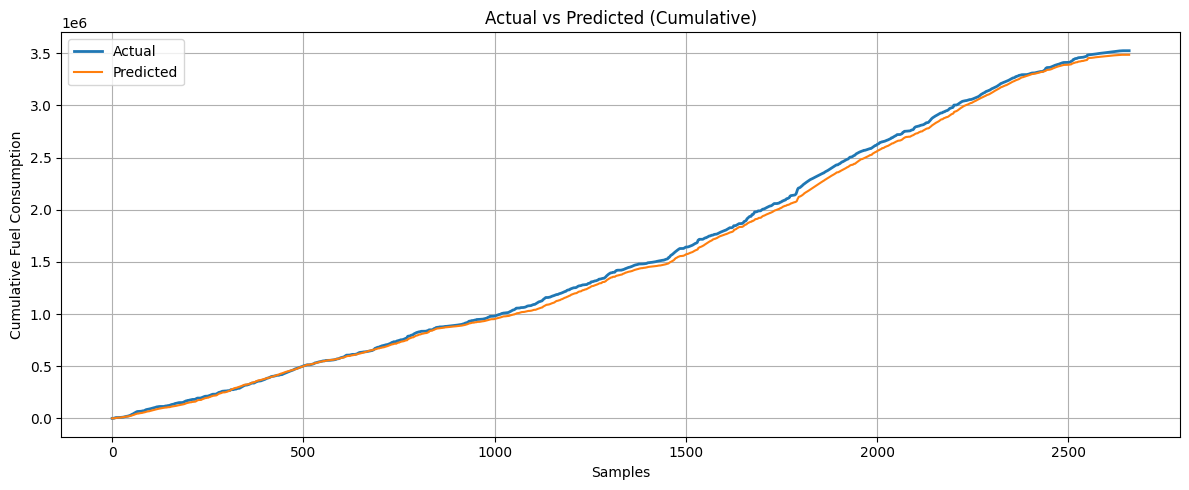

791.4093838124911
38966.89099999983
🔄 Processing: trip_102.0_part_1_6.csv


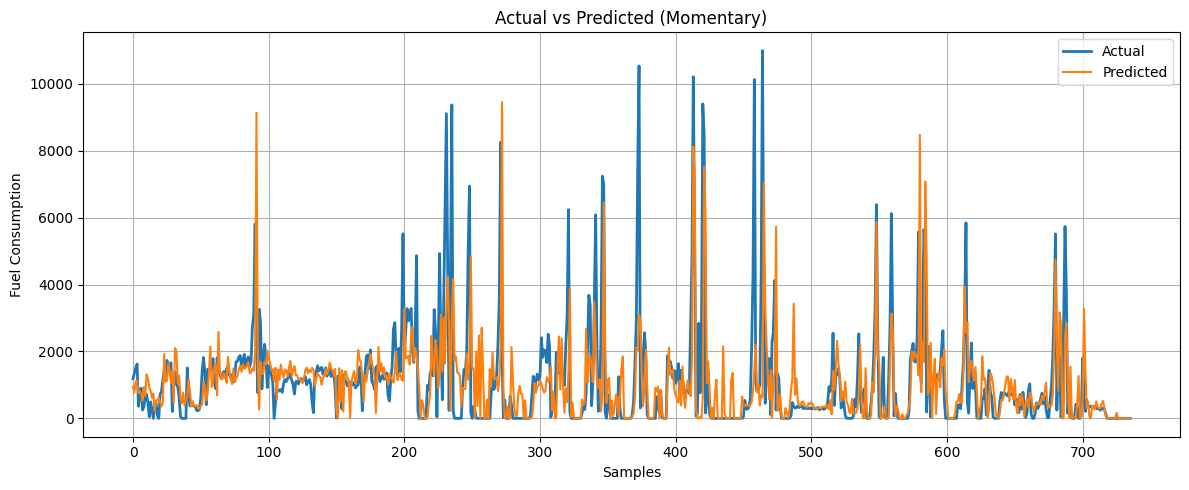

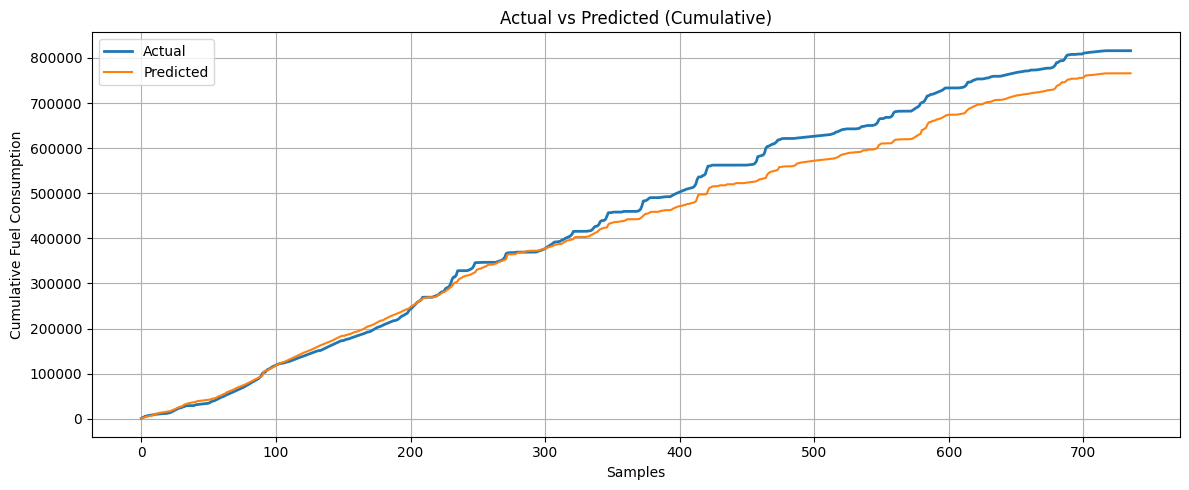

758.4469477054375
50082.71799999999
🔄 Processing: trip_181.0_part_6_6.csv


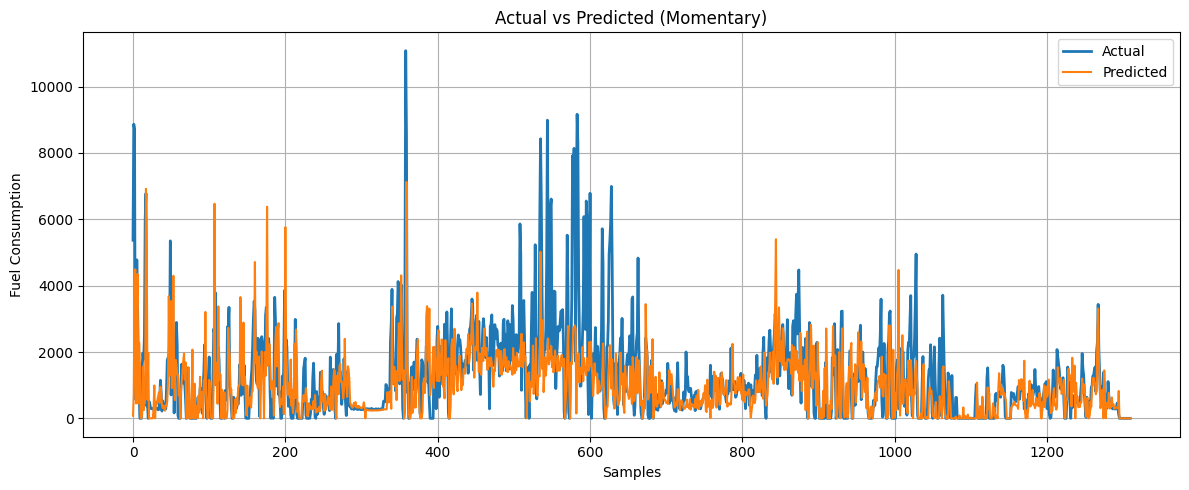

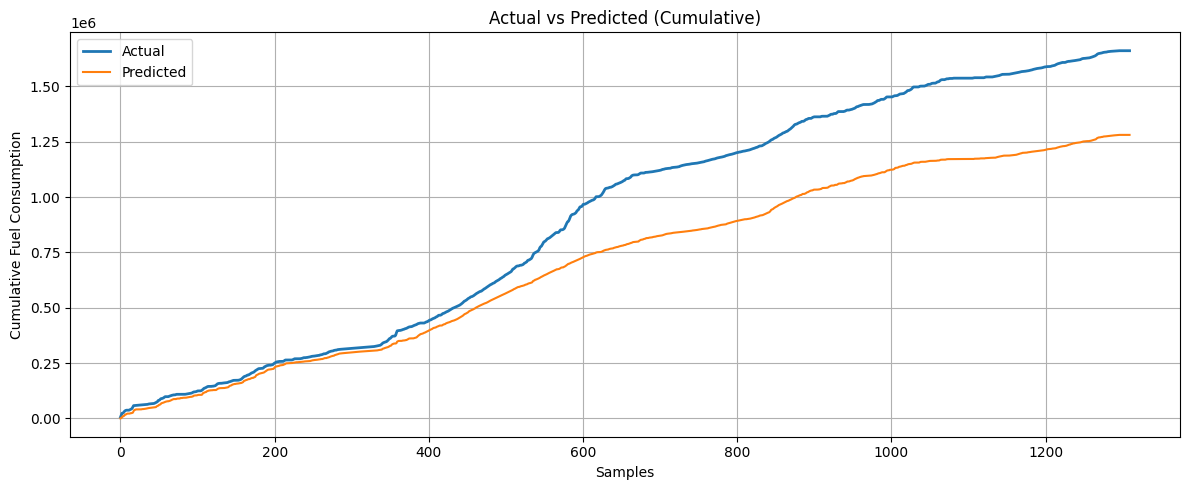

742.9957858393557
380337.922
🔄 Processing: trip_68.0_part_1_6.csv


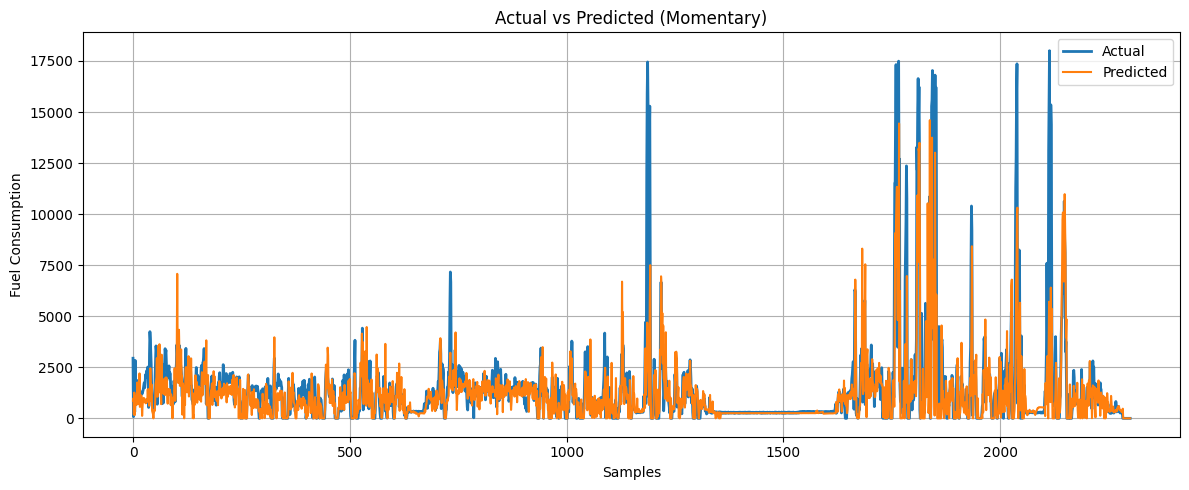

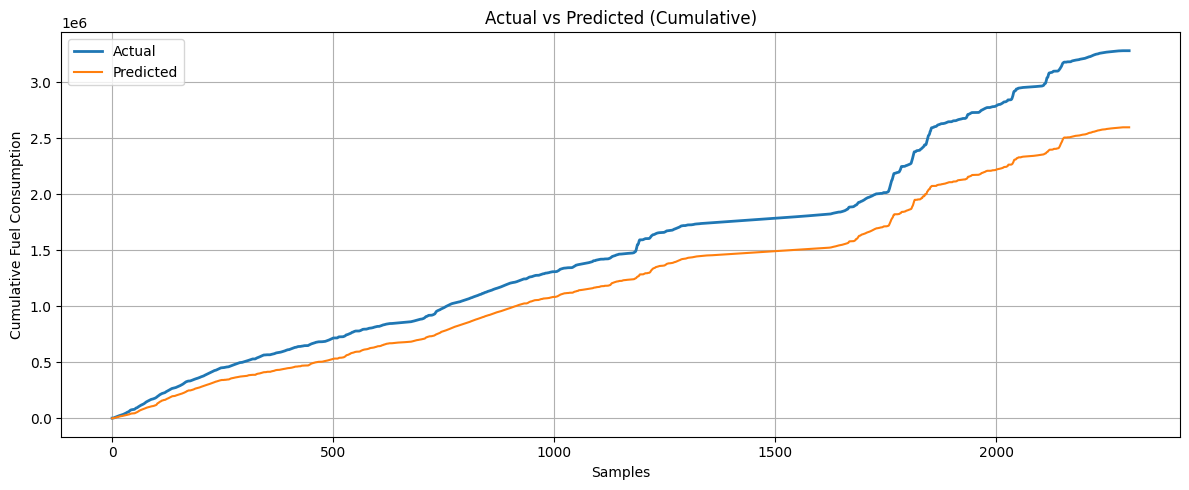

718.954067172943
683927.1719999998
🔄 Processing: trip_182.0_part_2_6.csv


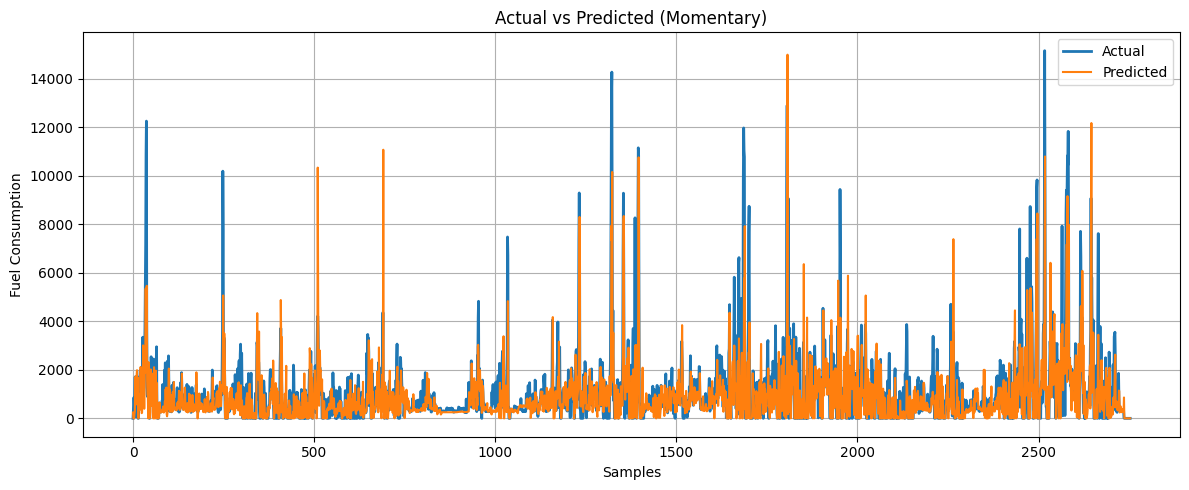

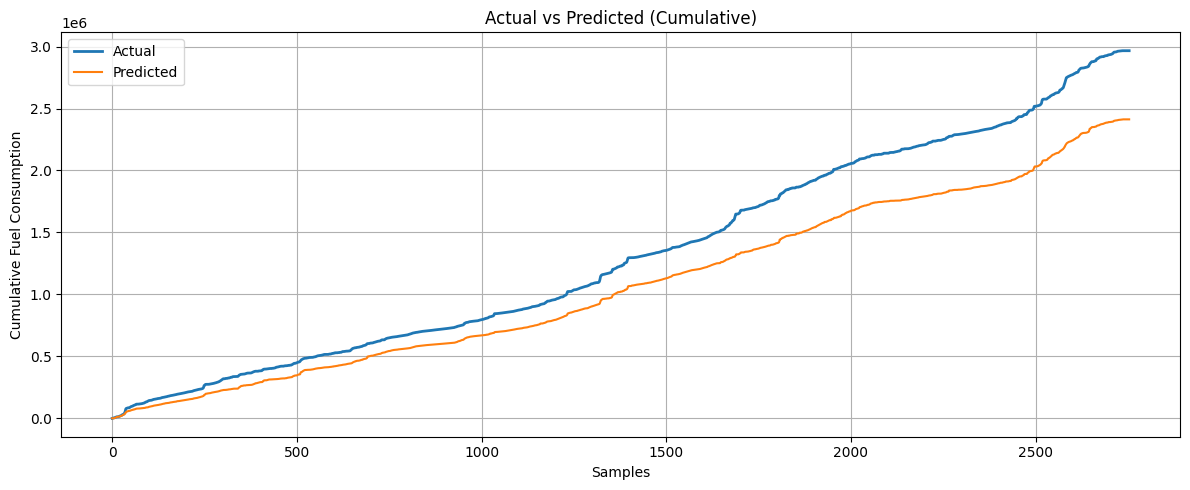

699.840286309676
553953.094
🔄 Processing: trip_11.0_part_1_6.csv


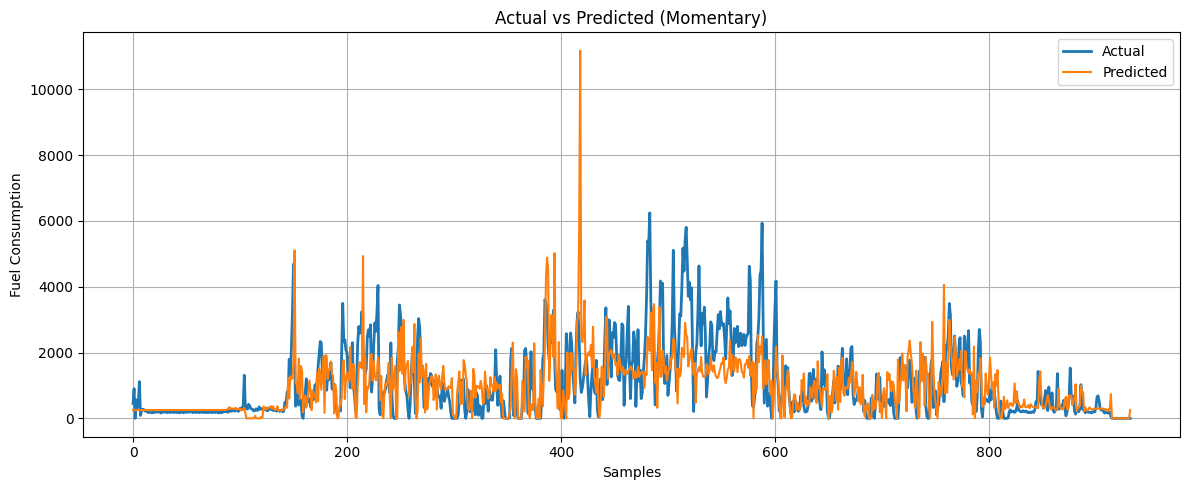

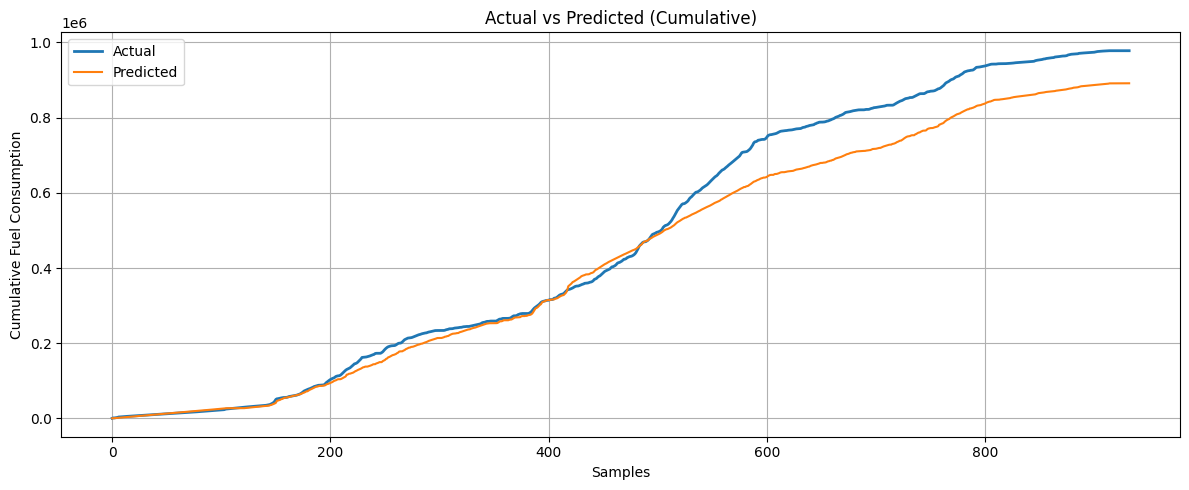

605.104526841084
86608.62549999997
🔄 Processing: trip_67.0_part_1_6.csv


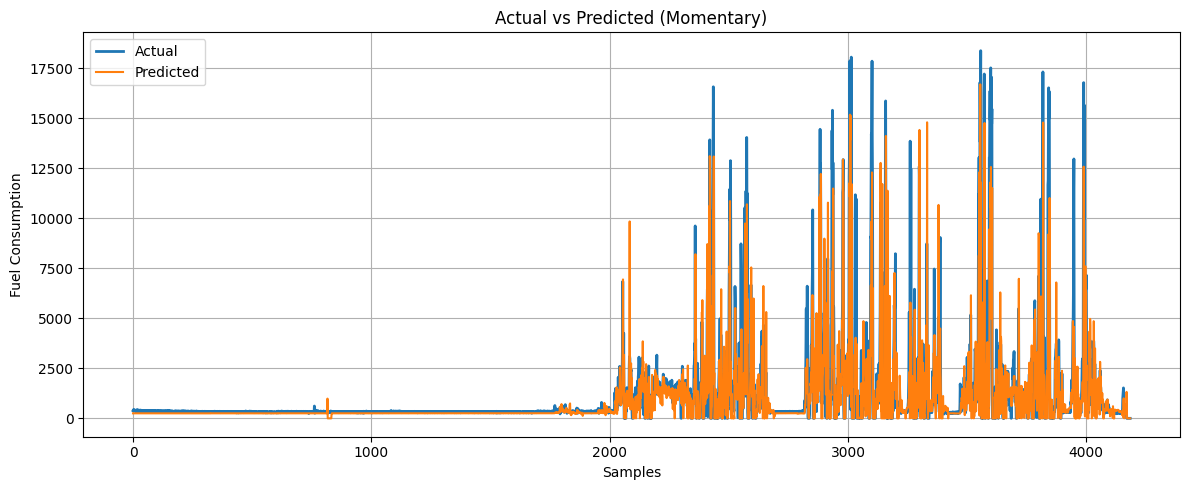

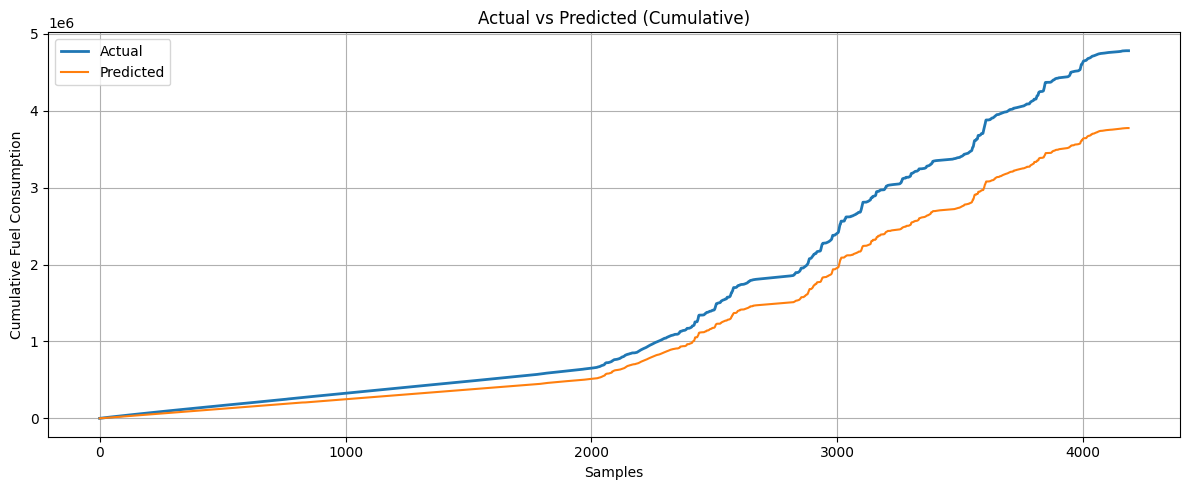

582.0369559076413
1006069.3909999998
🔄 Processing: trip_179.0_part_1_6.csv


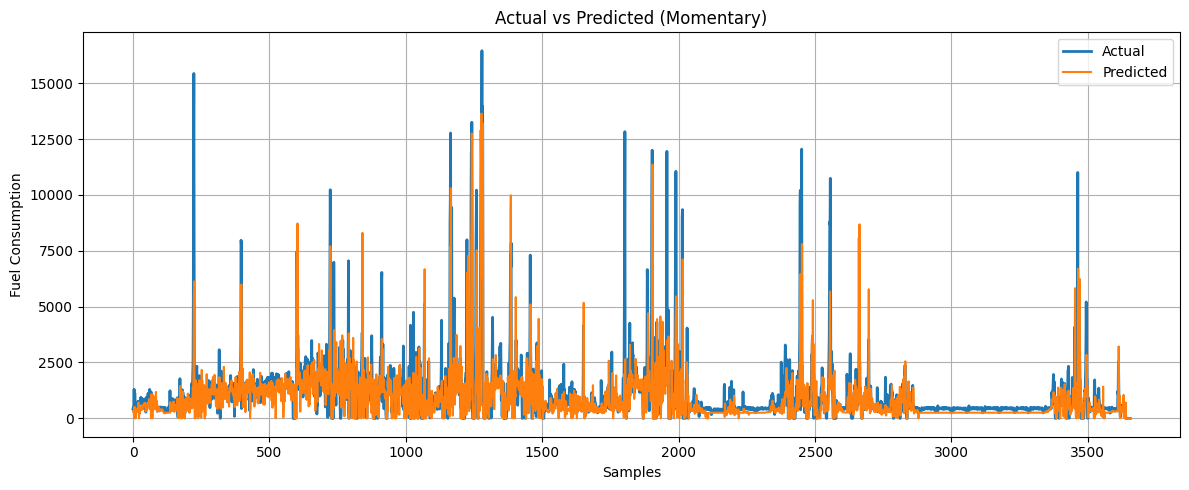

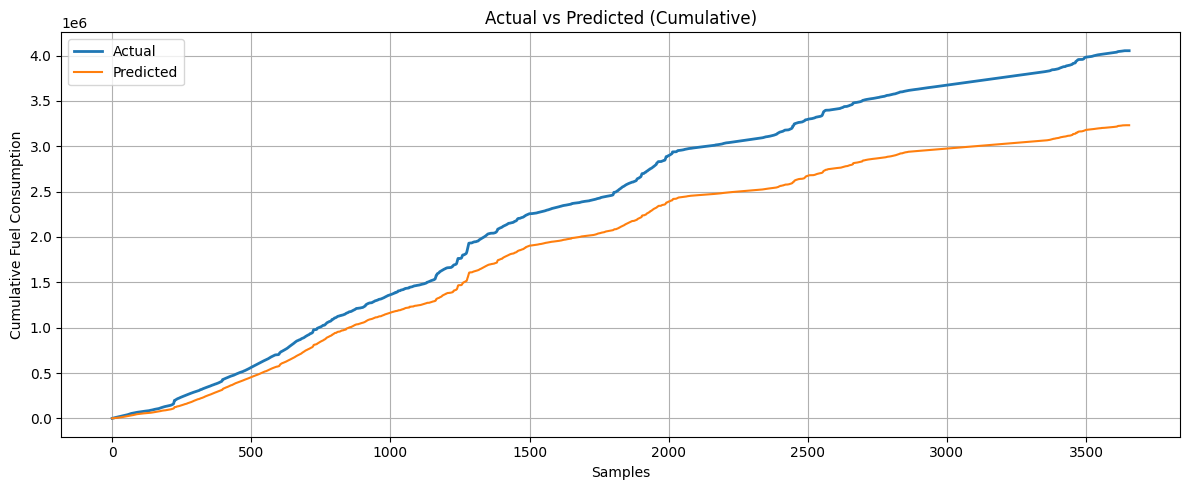

559.5576077749628
821544.75
🔄 Processing: trip_4.0_part_1_6.csv


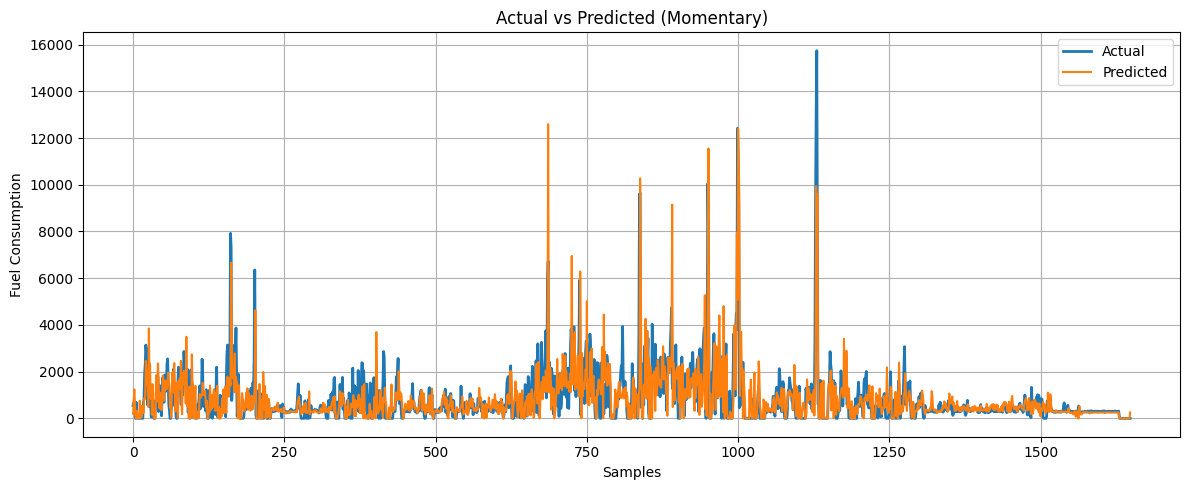

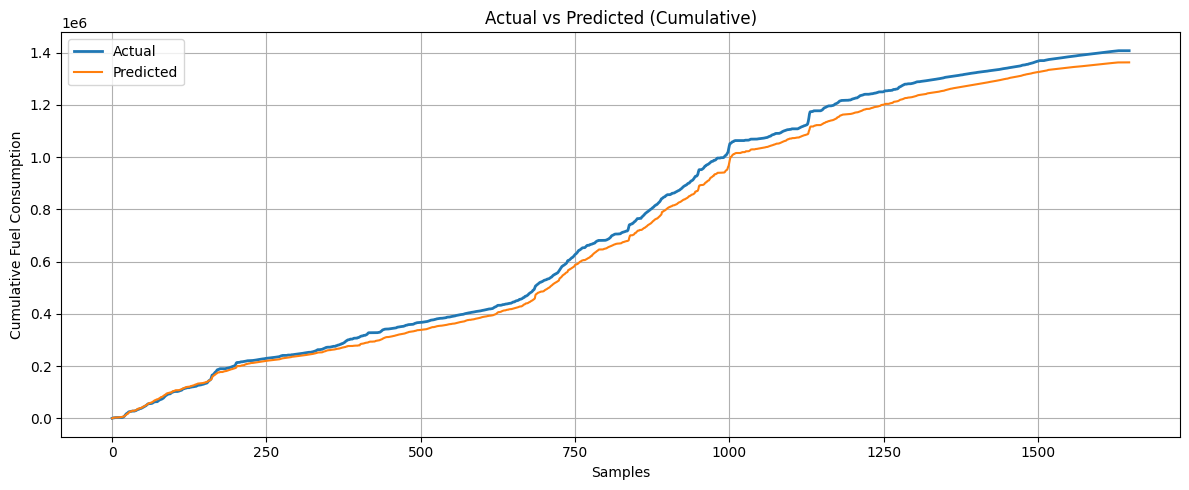

552.2035638146524
44655.875
🔄 Processing: trip_32.0_part_1_6.csv


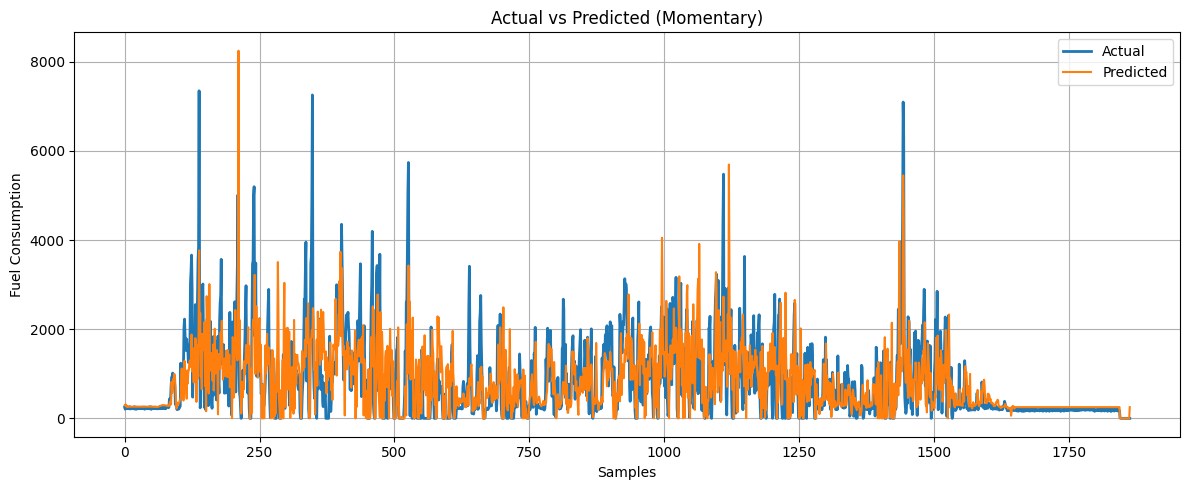

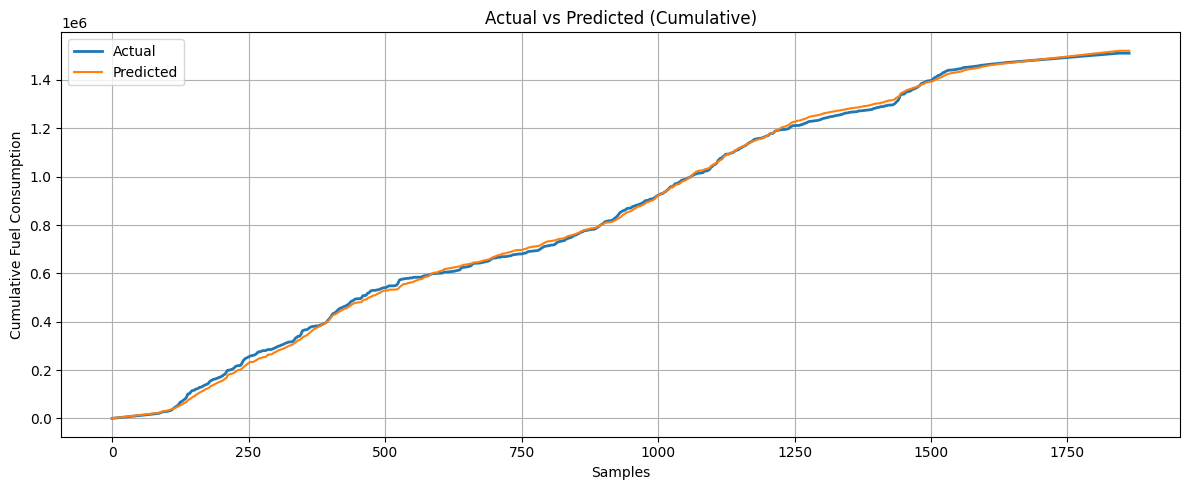

518.82983866859
10207.030999999959
🔄 Processing: trip_97.0_part_1_6.csv


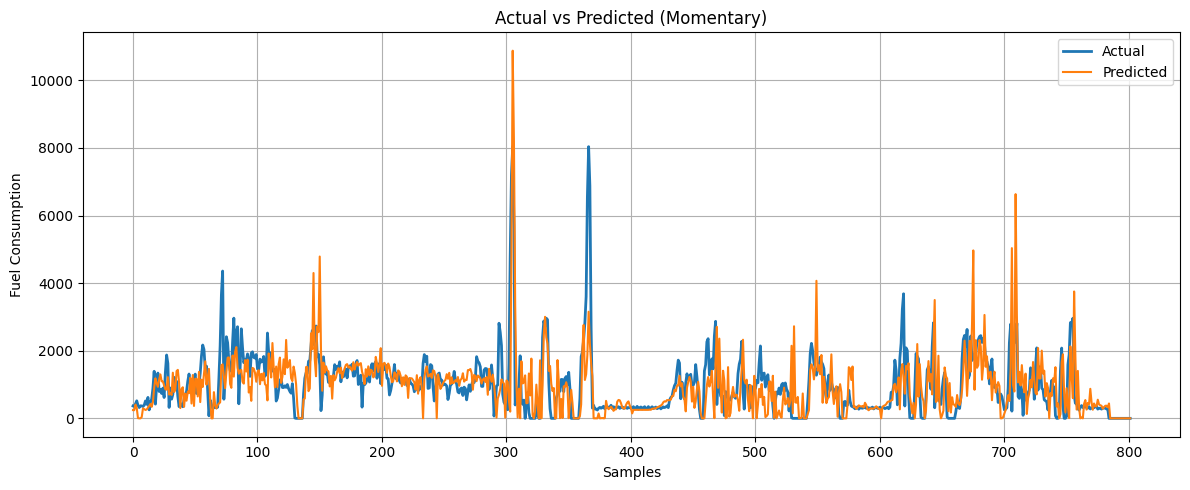

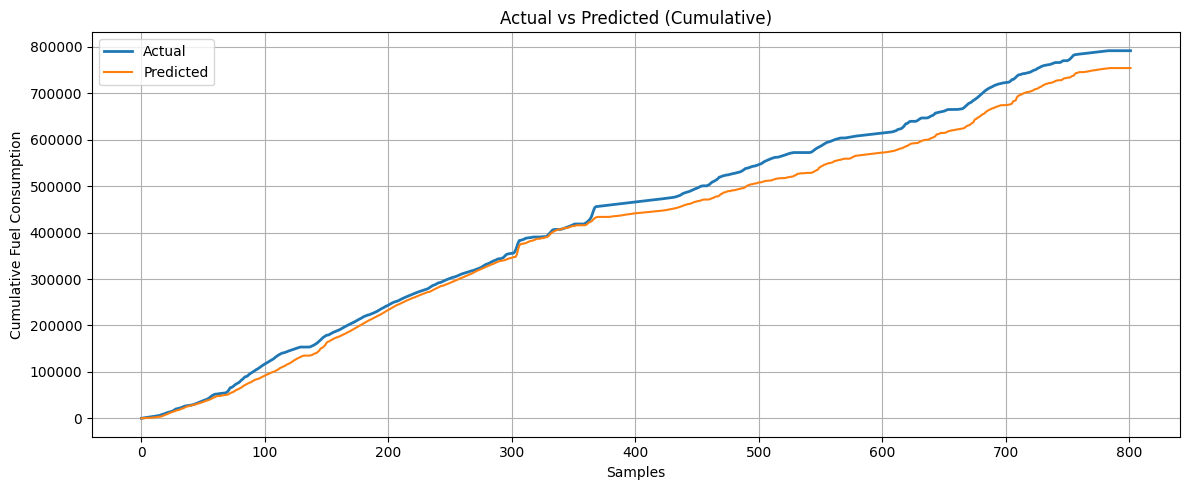

508.7340302527339
37335.4375
🔄 Processing: trip_53.0_part_1_6.csv


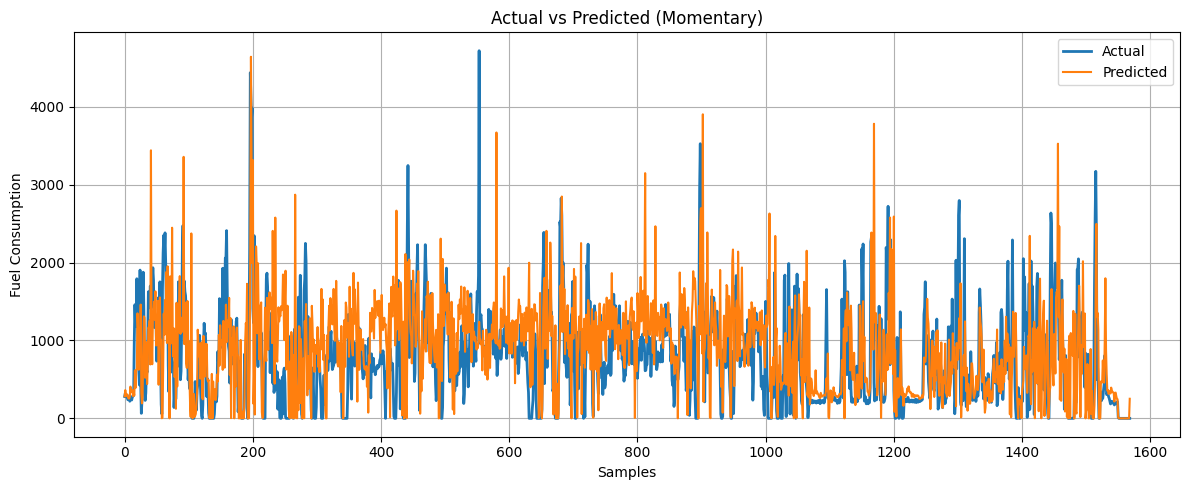

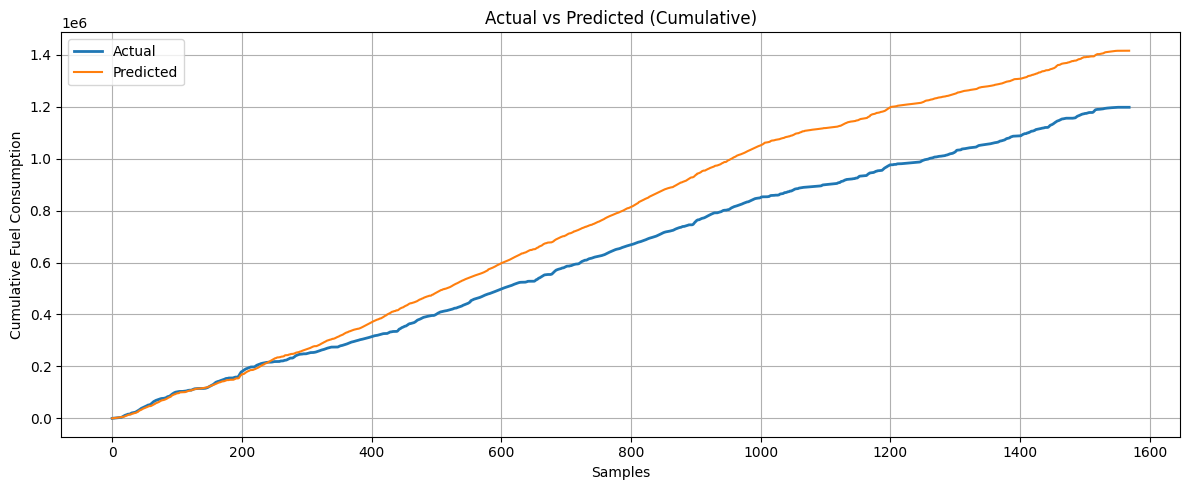

492.2393821591274
217720.60899999994
🔄 Processing: trip_144.0_part_1_6.csv


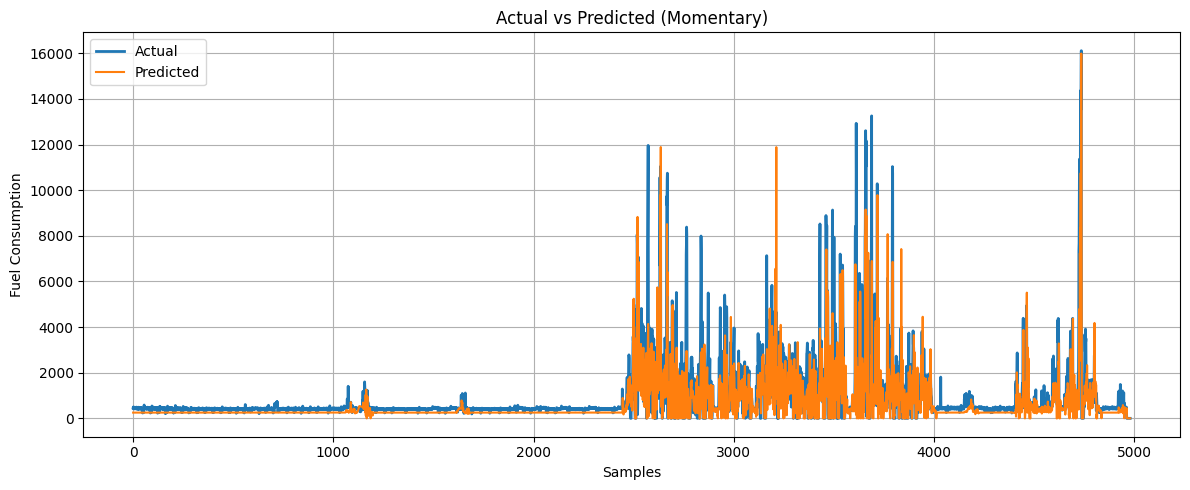

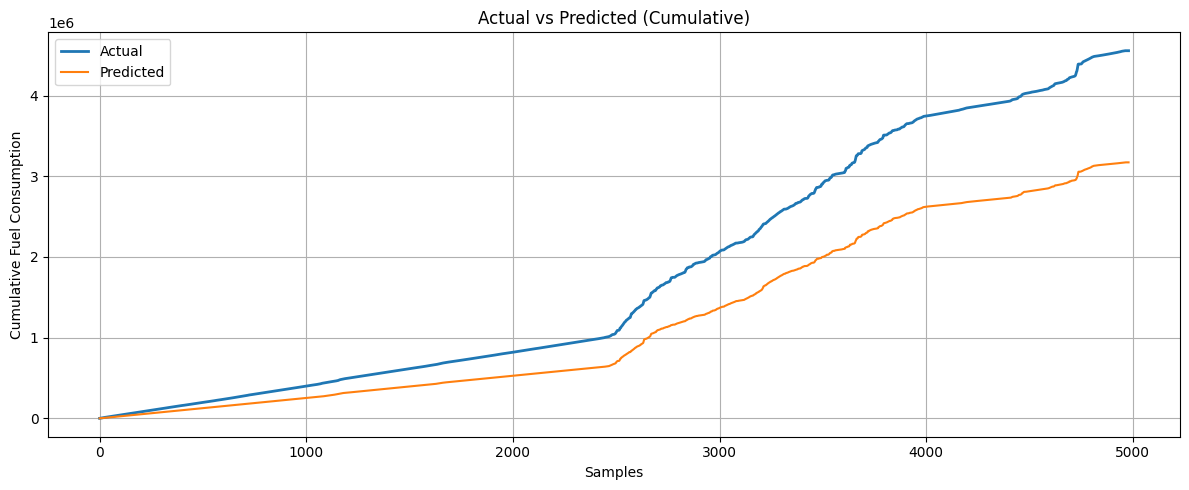

458.5155430189938
1383371.4220000003
🔄 Processing: trip_35.0_part_1_6.csv


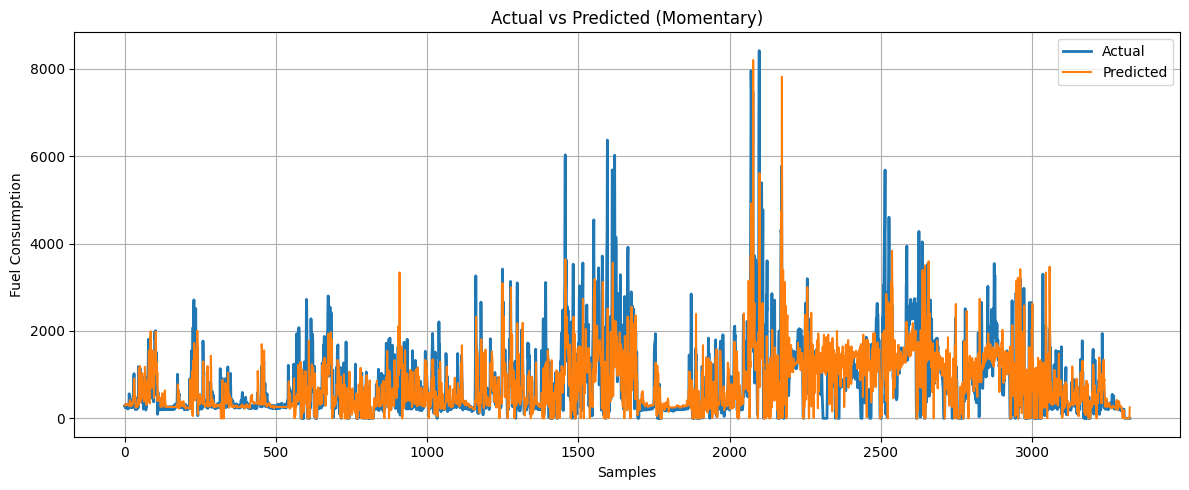

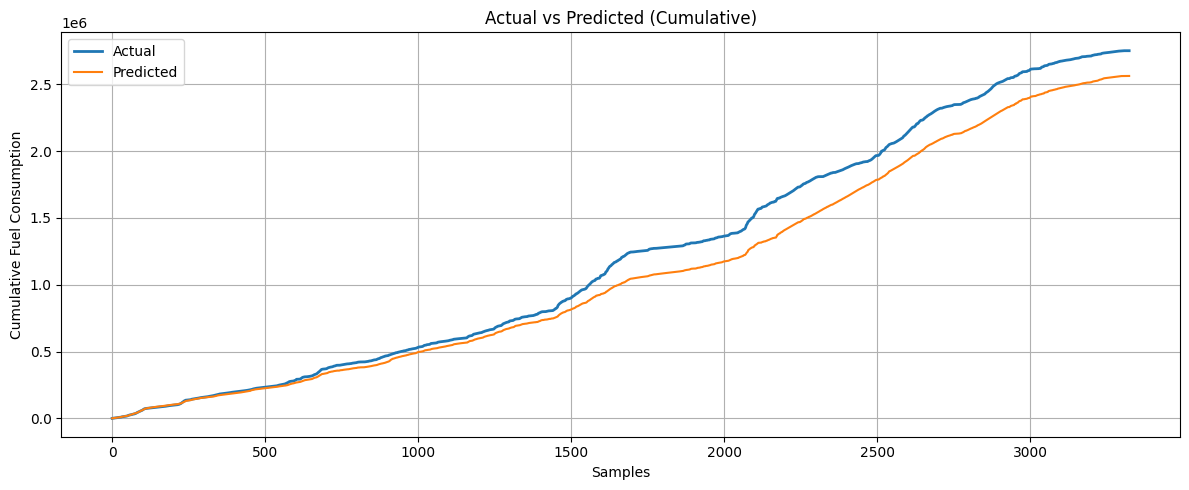

443.609137431241
188826.98400000017
🔄 Processing: trip_193.0_part_1_6.csv


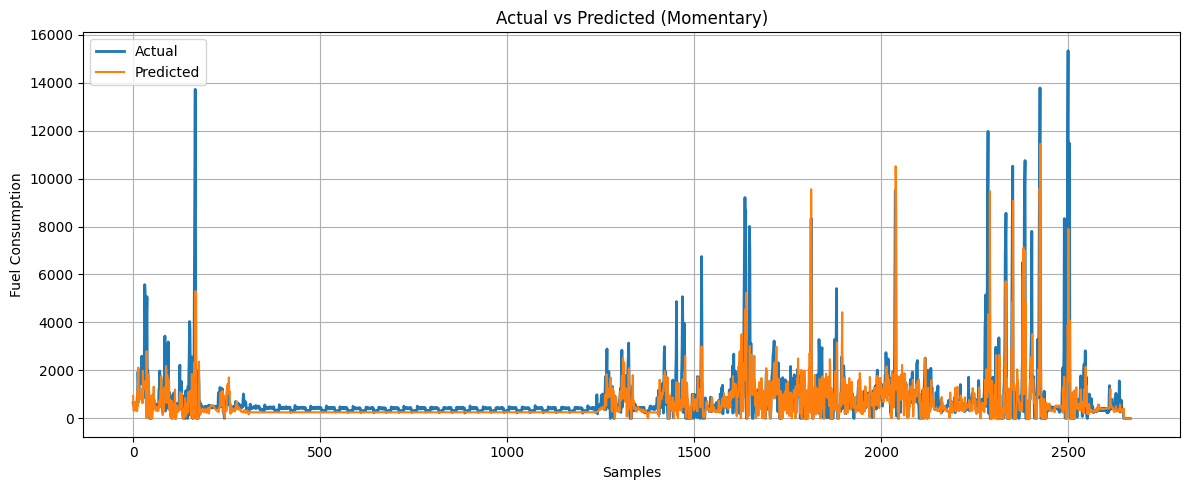

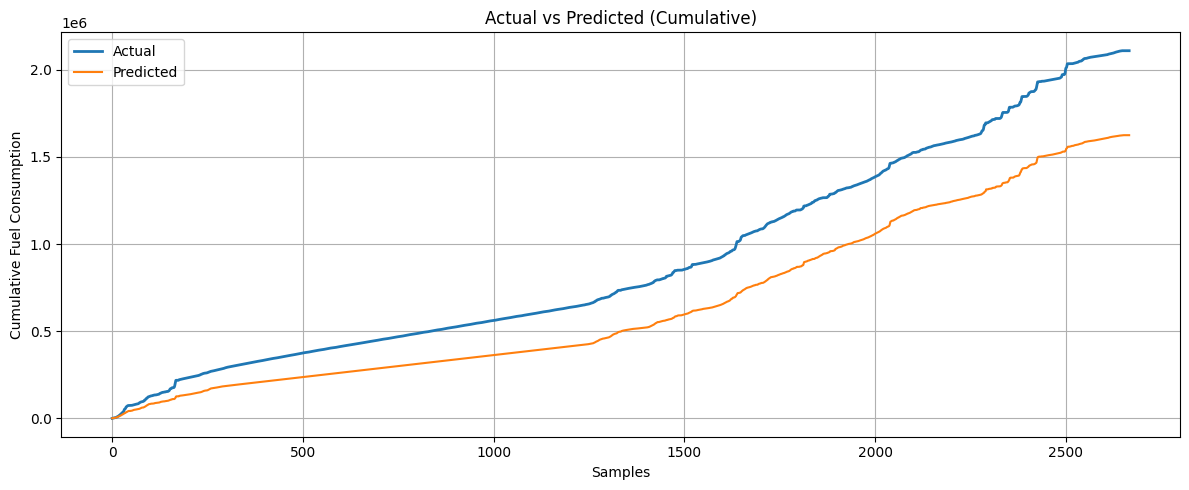

443.54170455661637
484405.9840000002
🔄 Processing: trip_109.0_part_1_6.csv


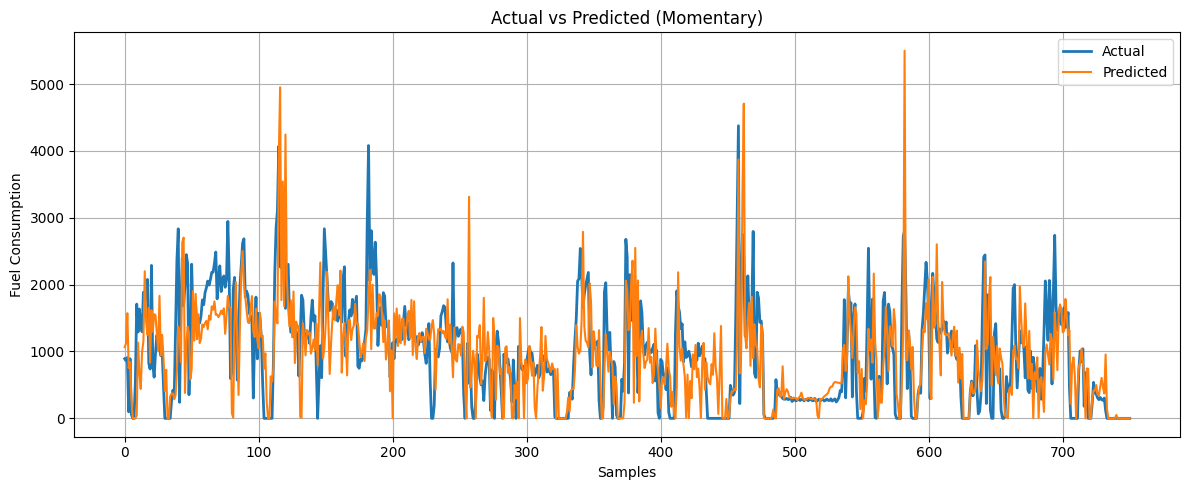

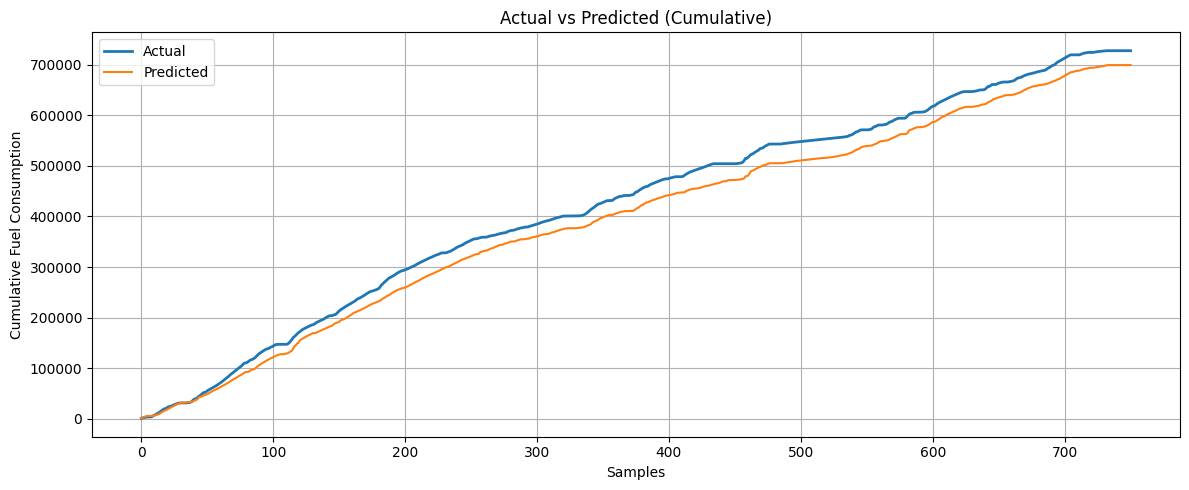

441.3306843812659
28412.062000000034
🔄 Processing: trip_99.0_part_1_6.csv


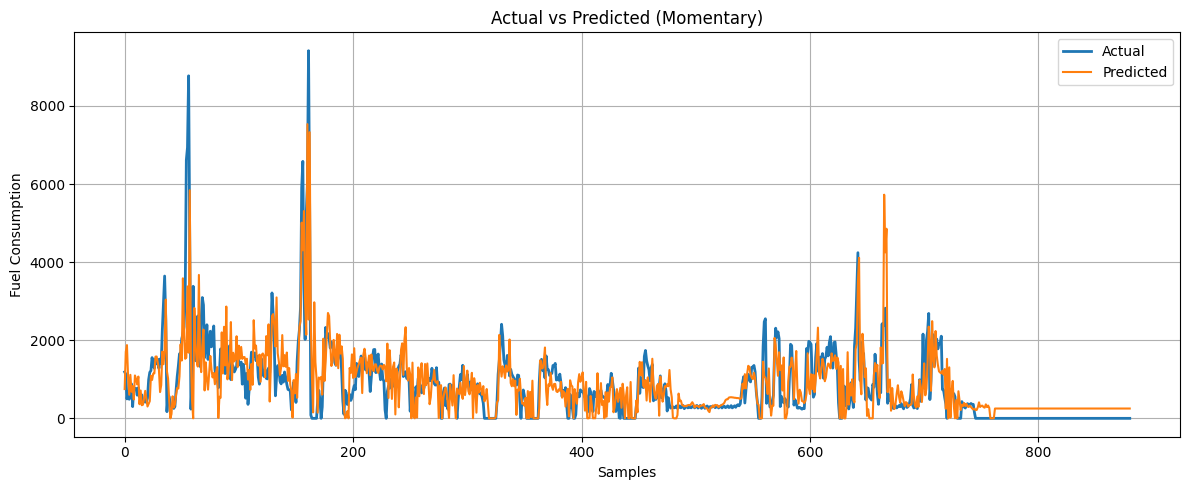

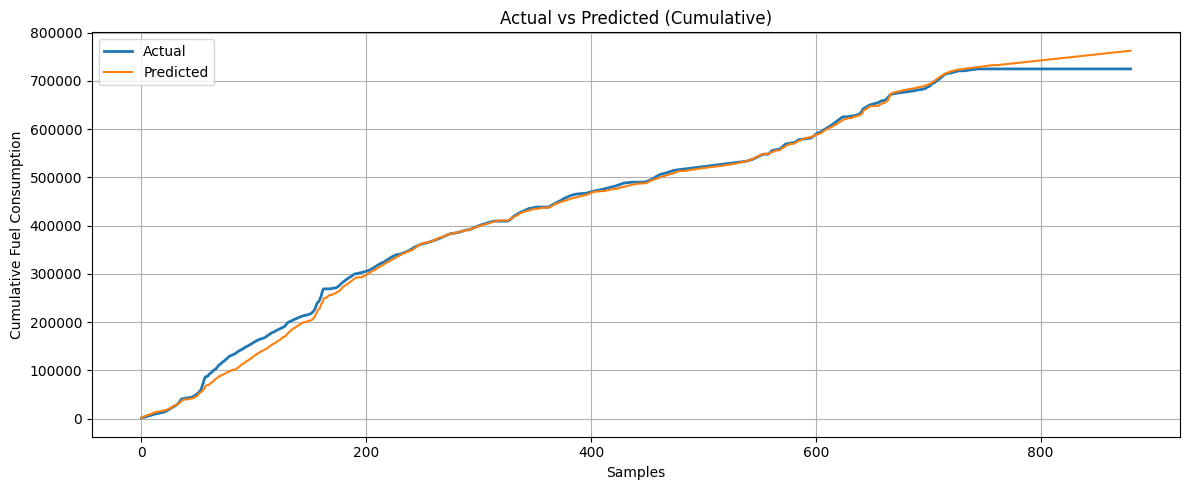

436.00621870854235
37713.9375
🔄 Processing: trip_189.0_part_1_6.csv


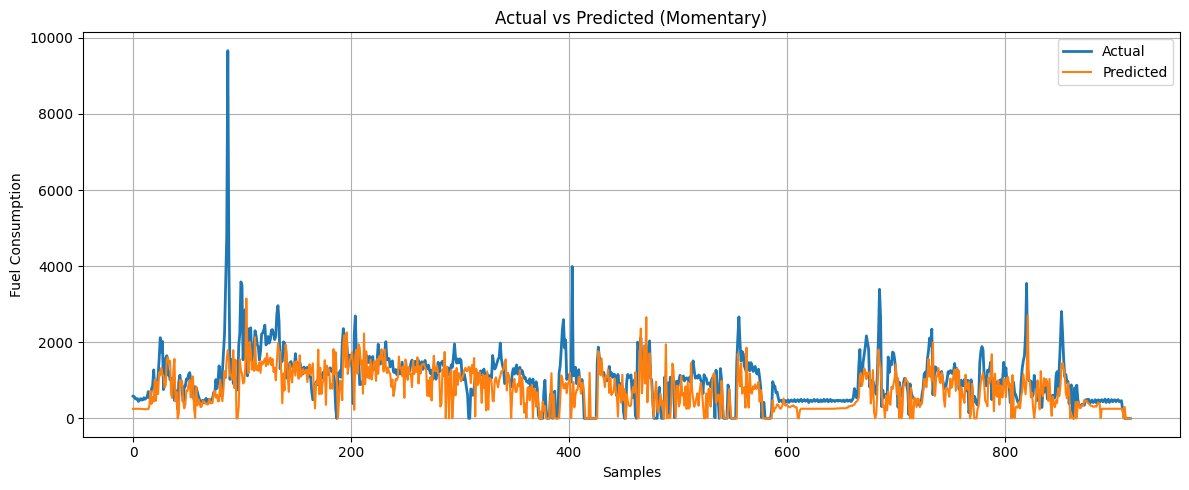

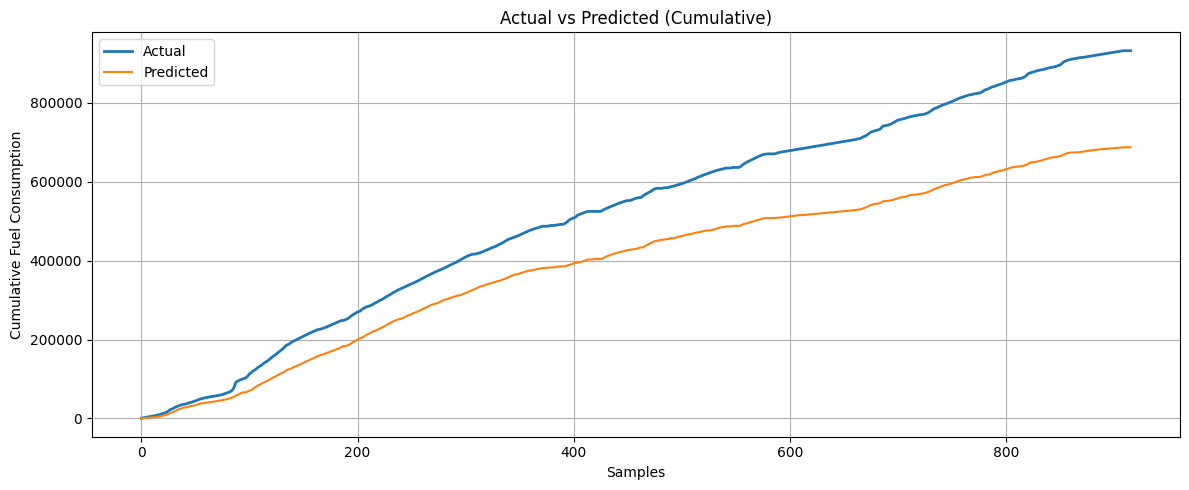

425.3689122381658
244686.40599999996
🔄 Processing: trip_36.0_part_2_6.csv


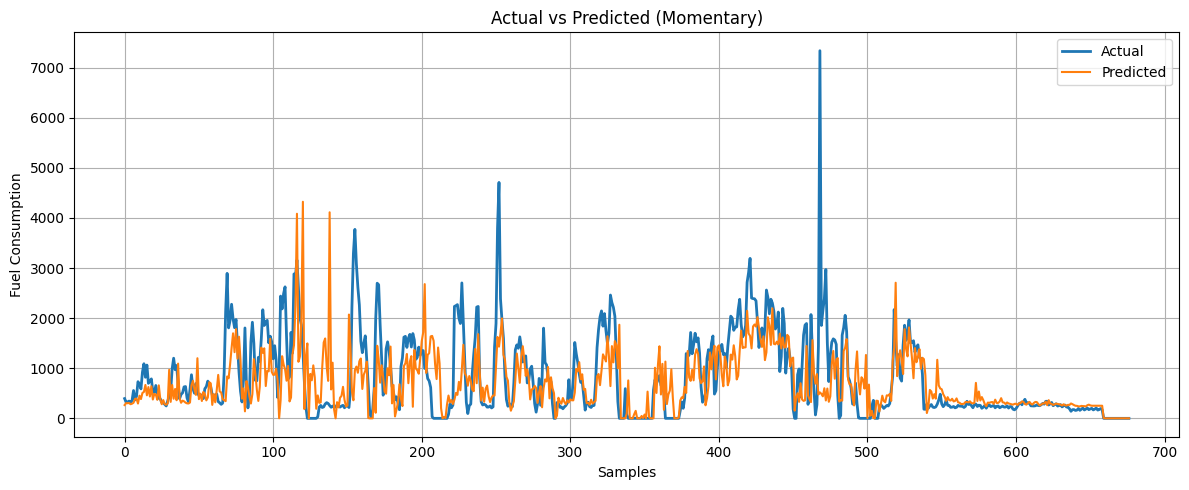

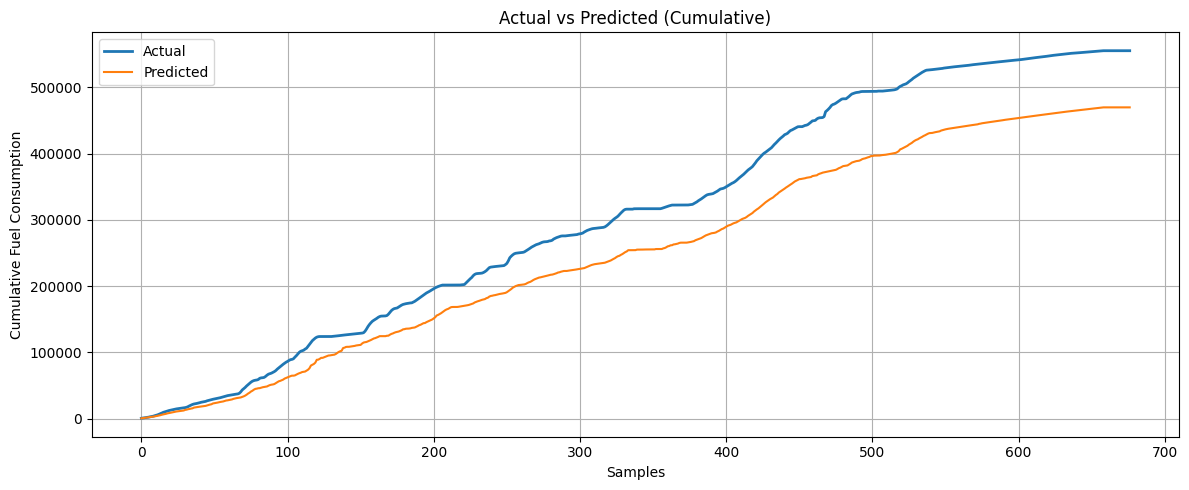

425.2029547883813
85554.26599999995
🔄 Processing: trip_17.0_part_1_6.csv


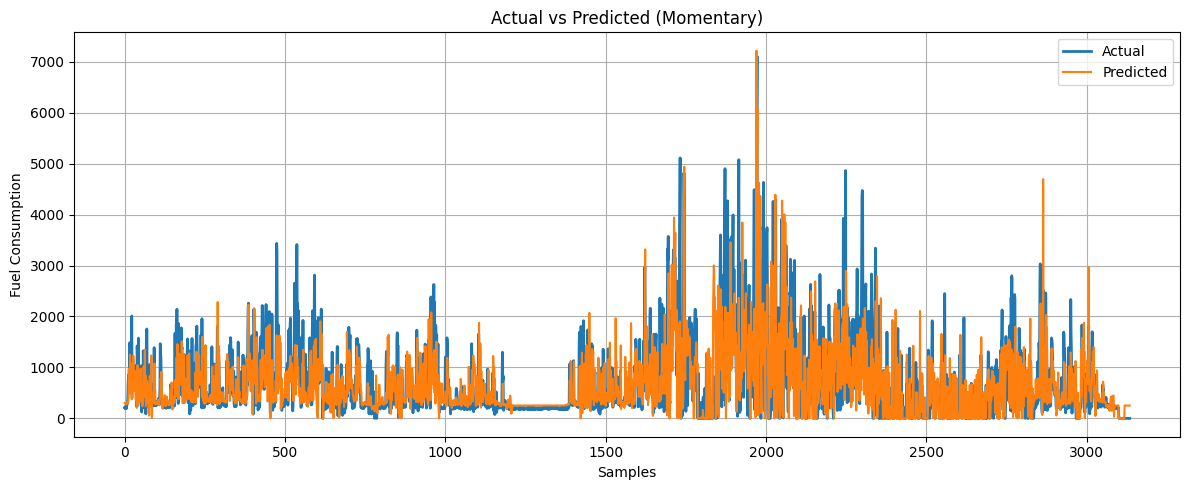

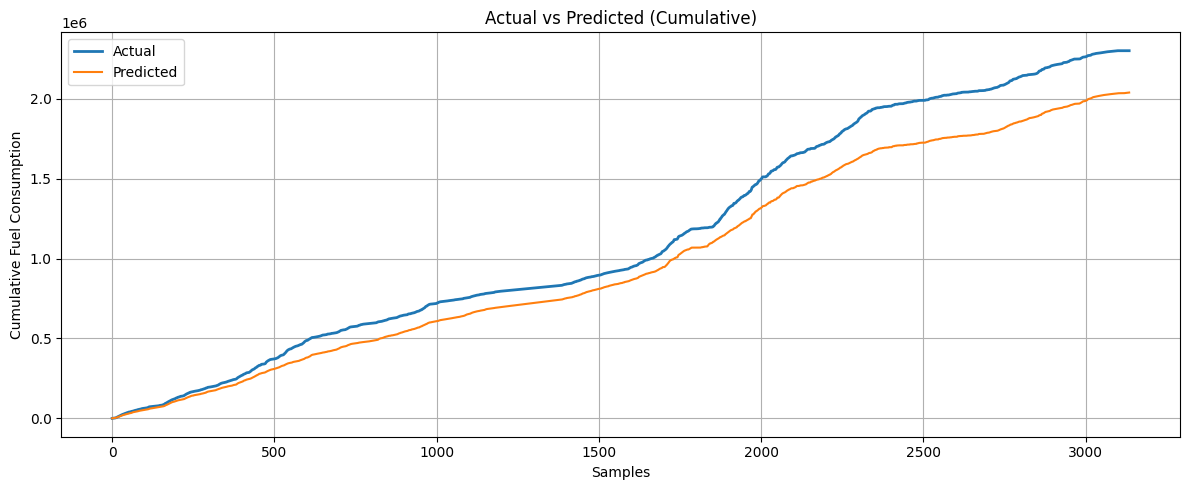

424.06363472895015
261731.04700000025
🔄 Processing: trip_100.0_part_1_6.csv


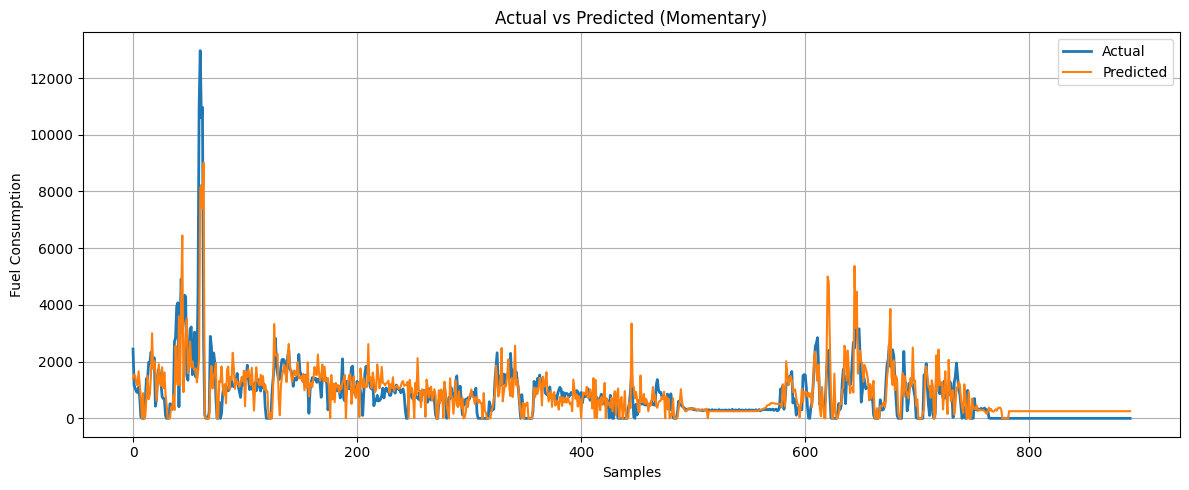

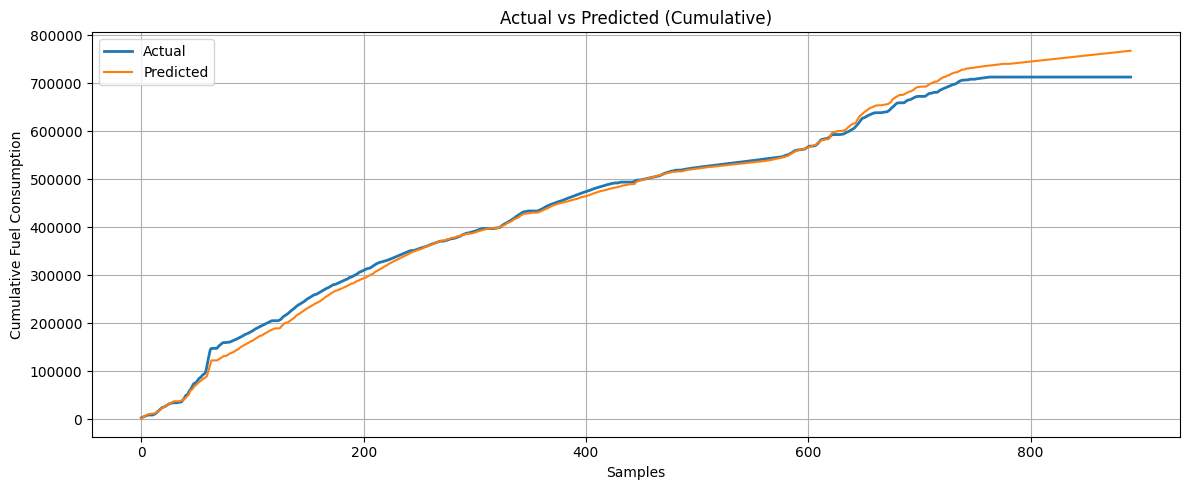

415.48863833747083
54951.17149999994
🔄 Processing: trip_178.0_part_7_6.csv


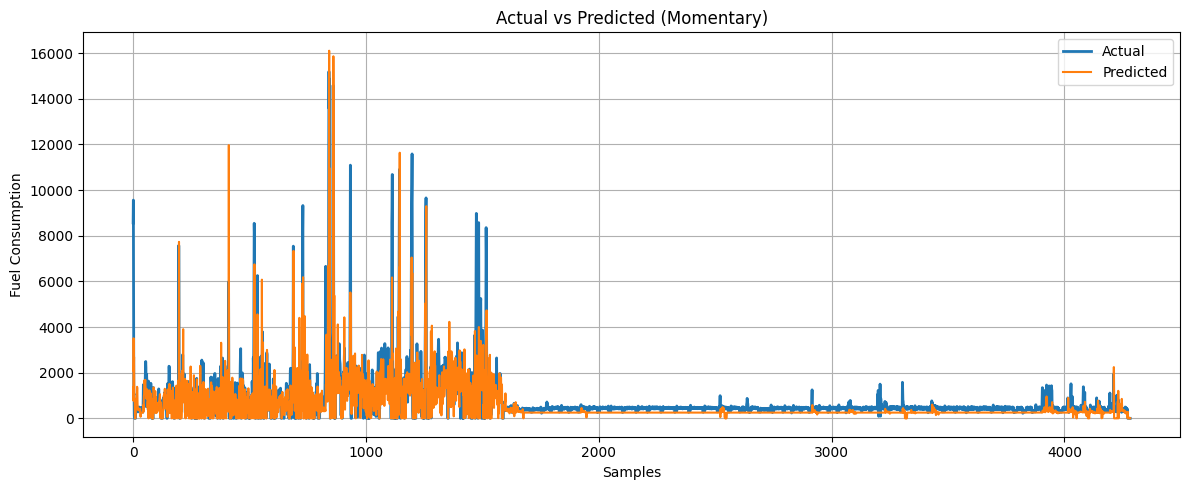

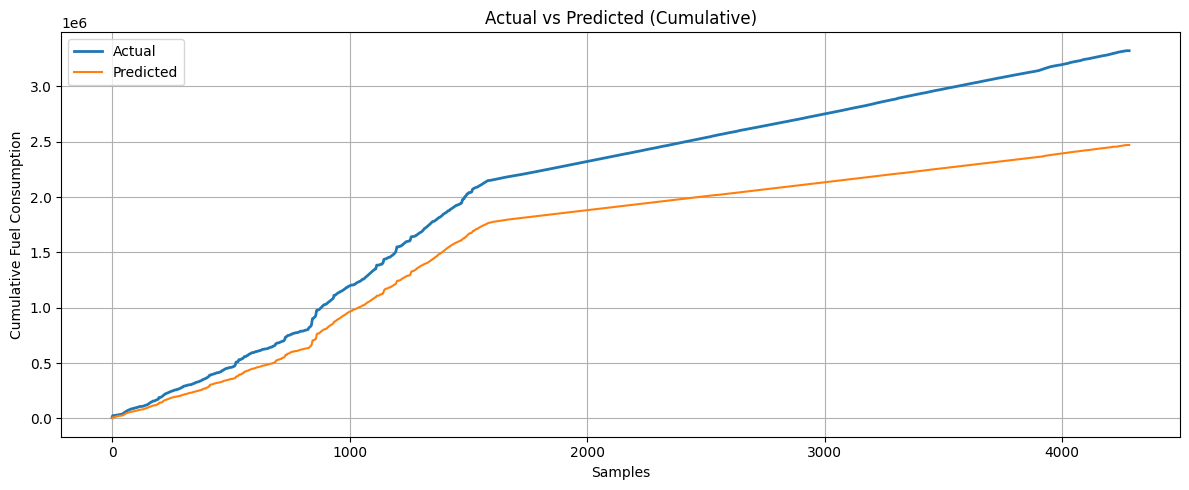

412.34661111830053
851847.3909999998
🔄 Processing: trip_60.0_part_1_6.csv


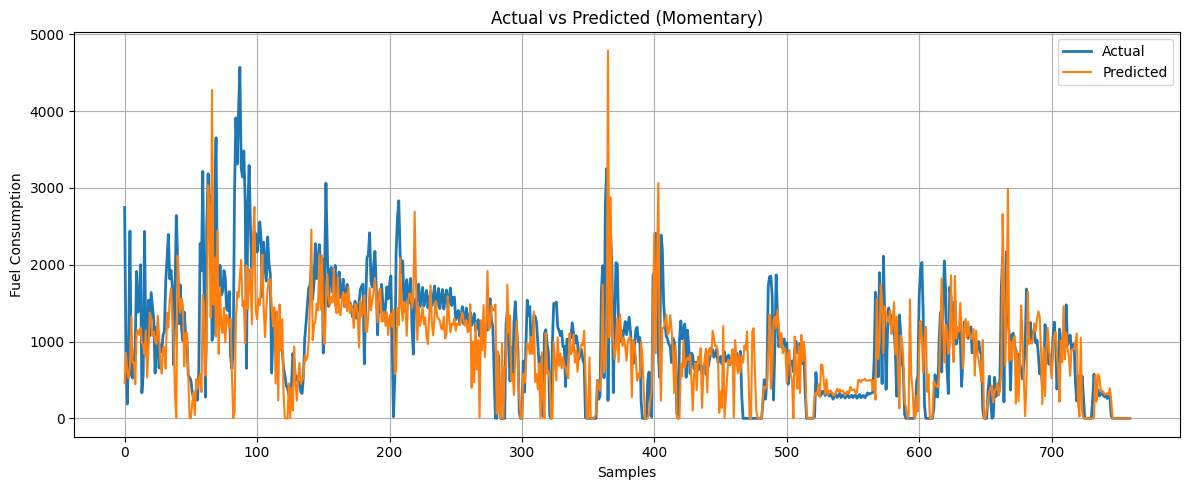

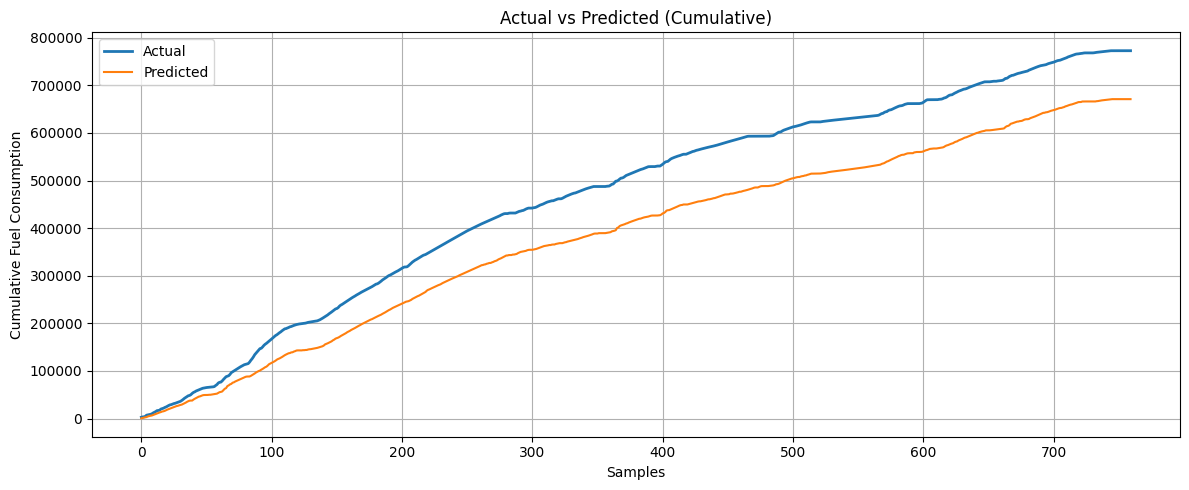

406.29646175609577
101737.6719999999
🔄 Processing: trip_98.0_part_1_6.csv


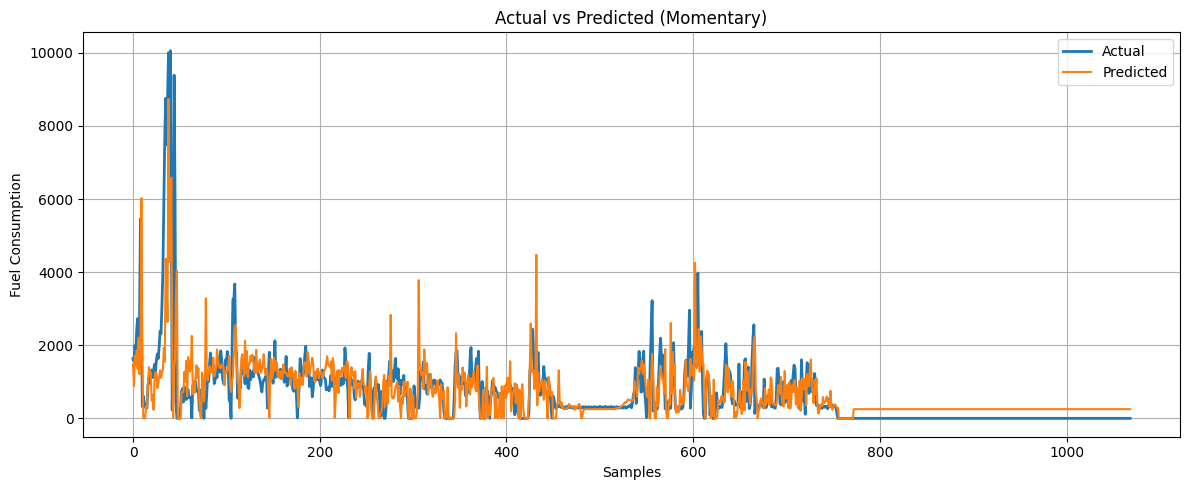

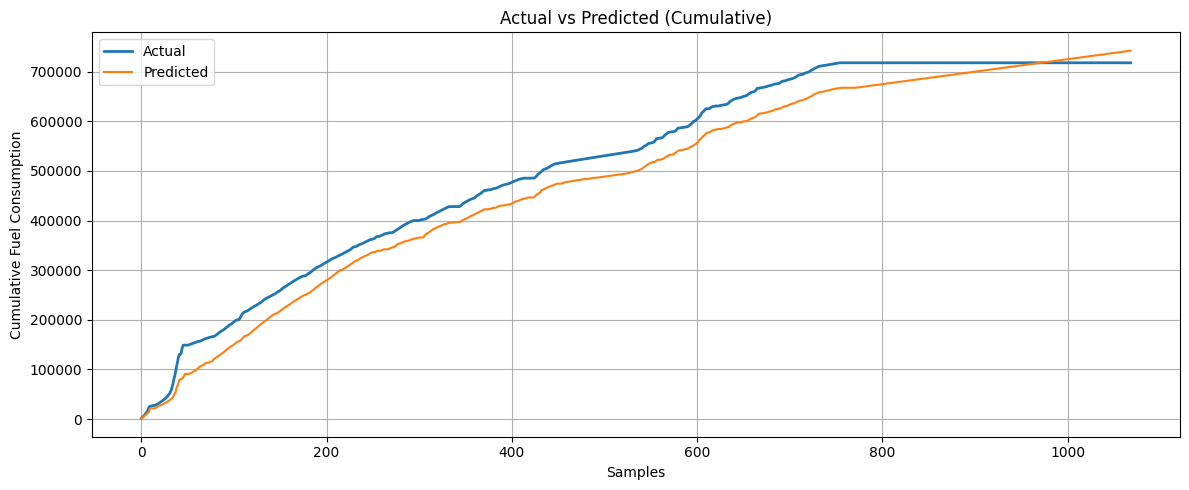

402.53109498153407
24329.171999999904
🔄 Processing: trip_55.0_part_2_6.csv


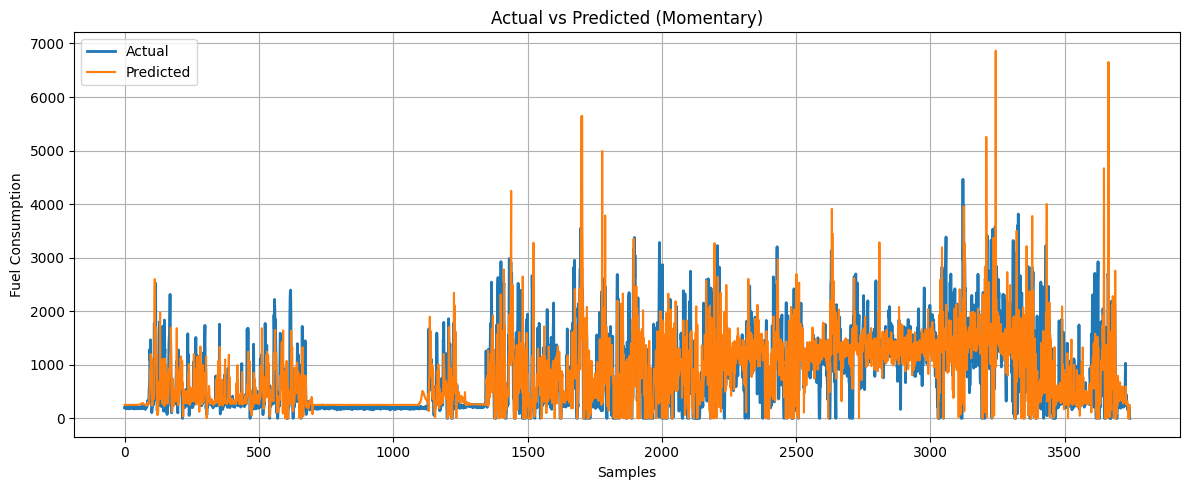

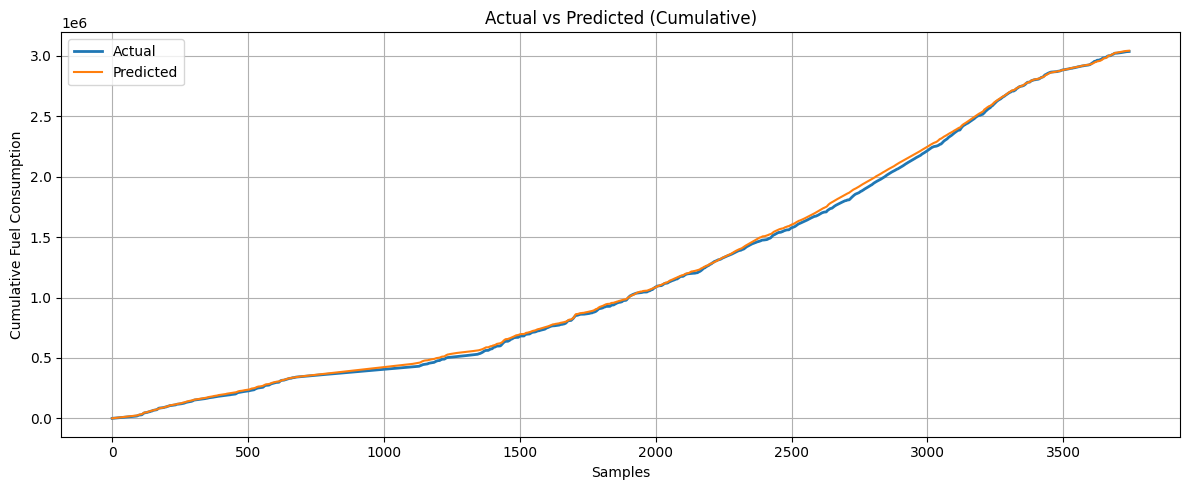

399.59283405373327
6353.561999999918
🔄 Processing: trip_76.0_part_1_6.csv


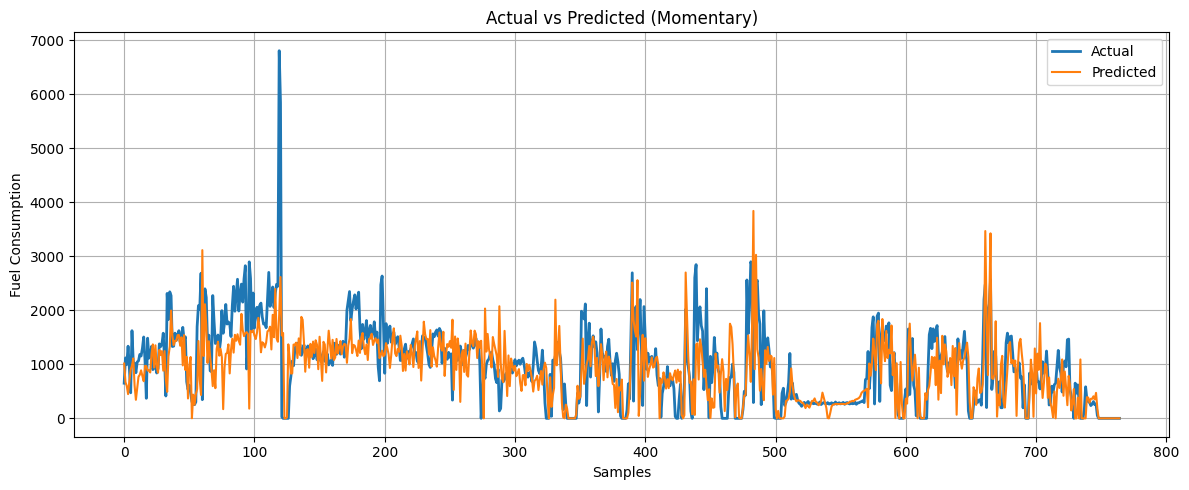

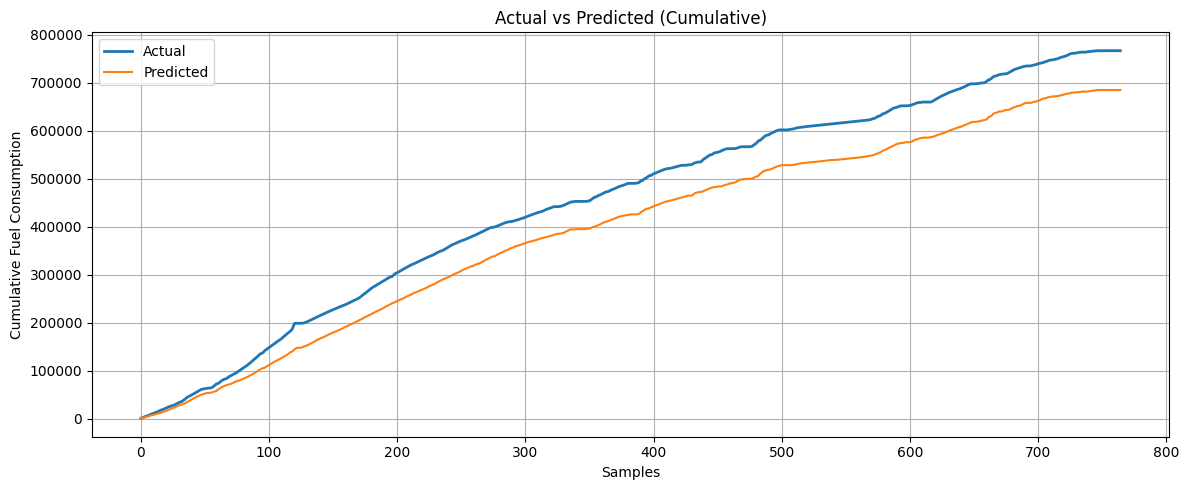

399.0916663587855
81937.73399999994
🔄 Processing: trip_70.0_part_1_6.csv


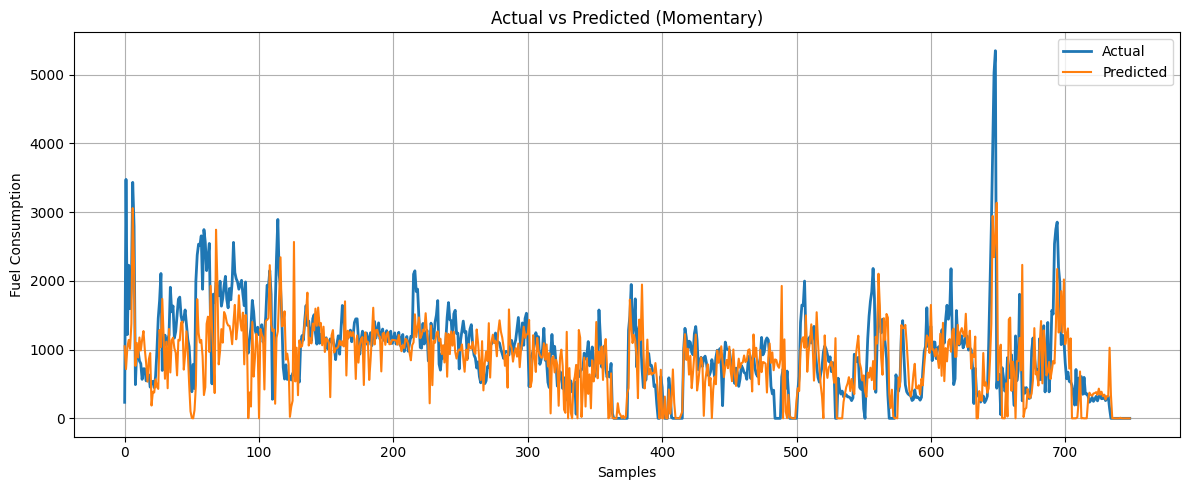

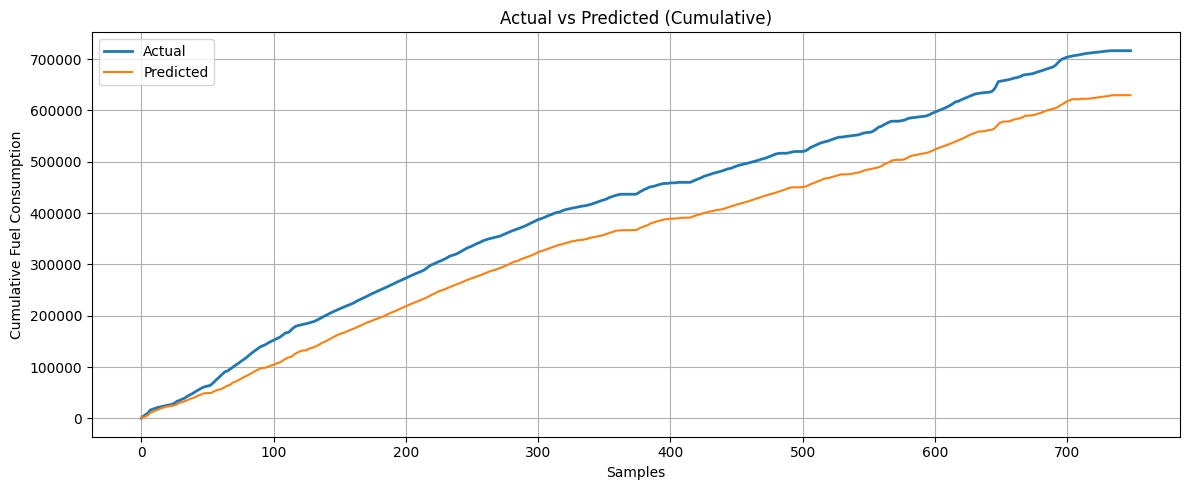

368.09635131019206
86628.0
🔄 Processing: trip_191.0_part_1_6.csv


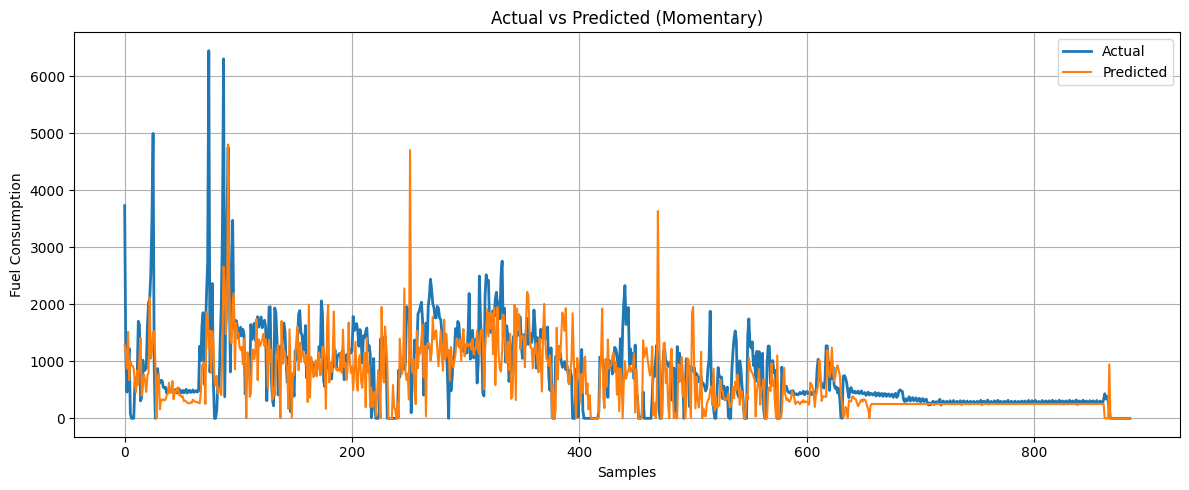

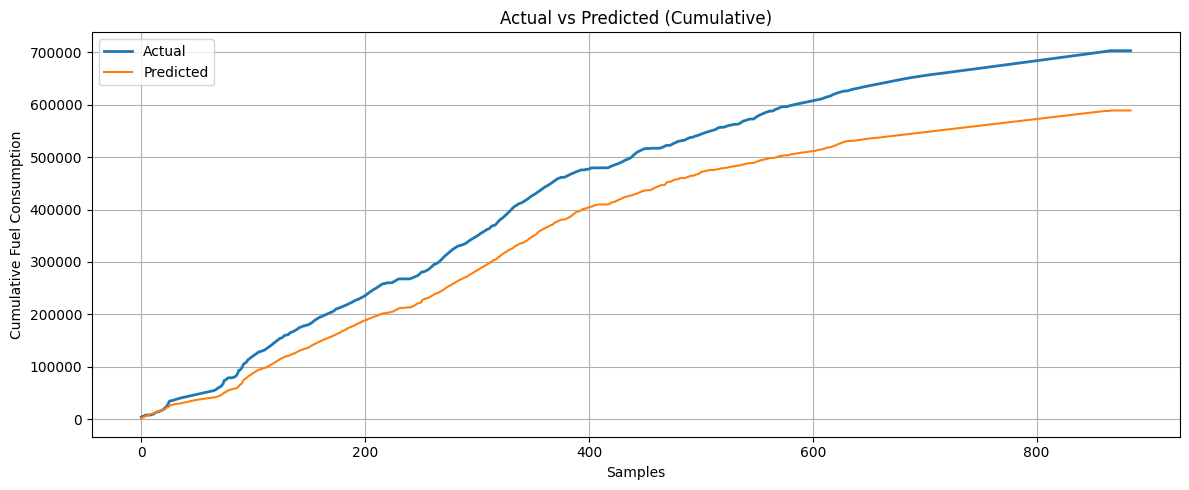

366.86331418655755
114105.15550000011
🔄 Processing: trip_103.0_part_1_6.csv


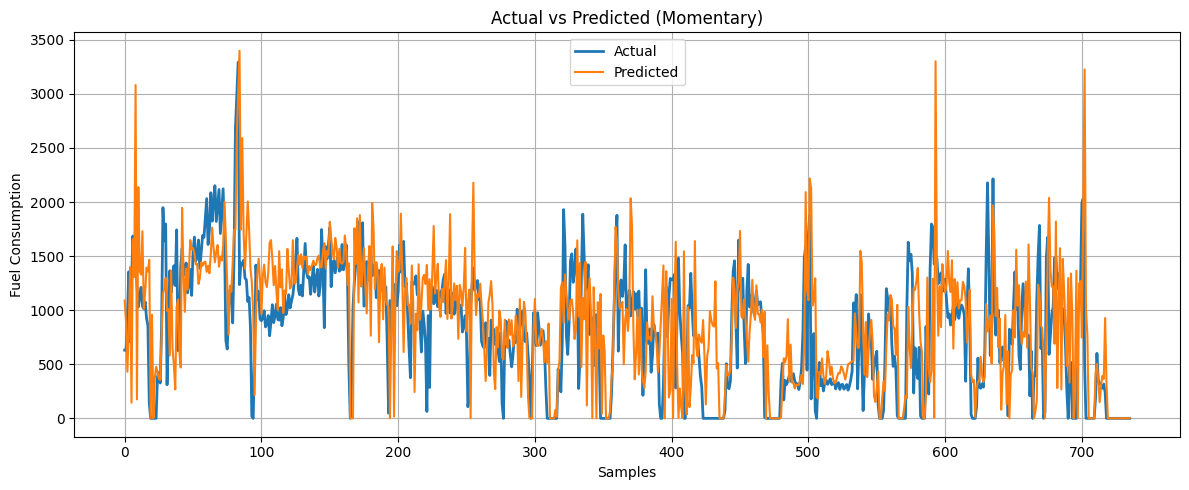

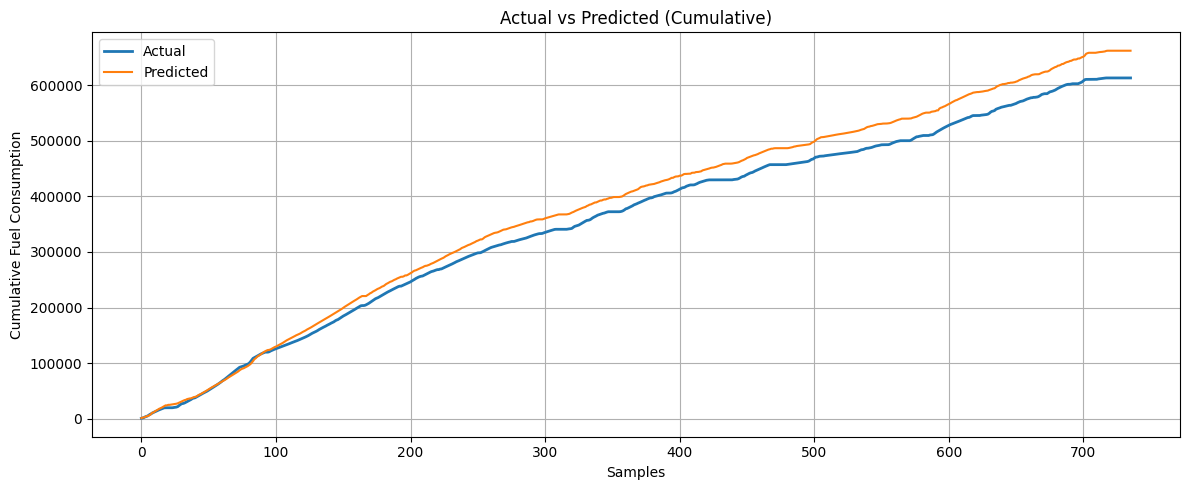

366.3283665036674
48990.98450000002
🔄 Processing: trip_49.0_part_1_6.csv


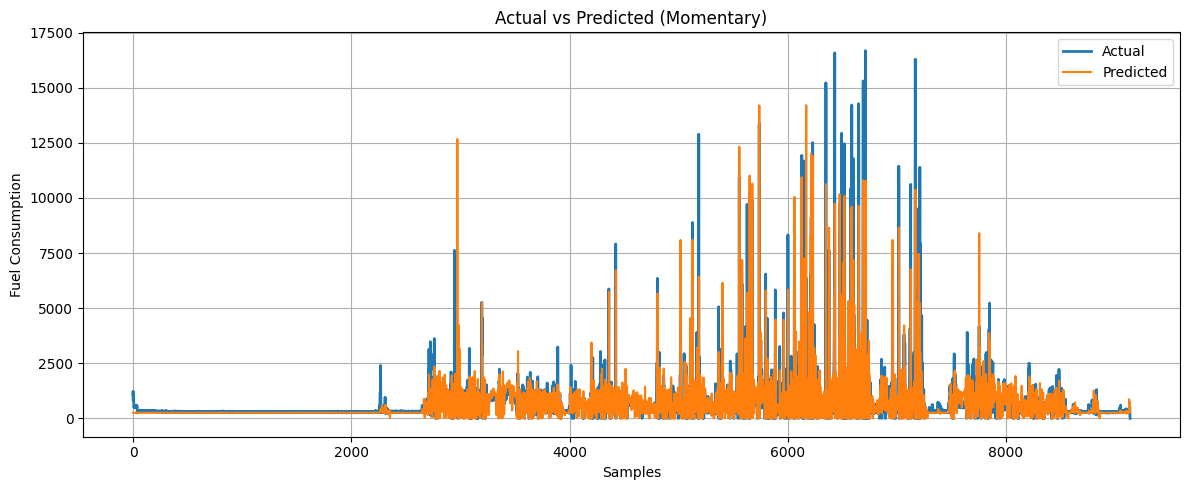

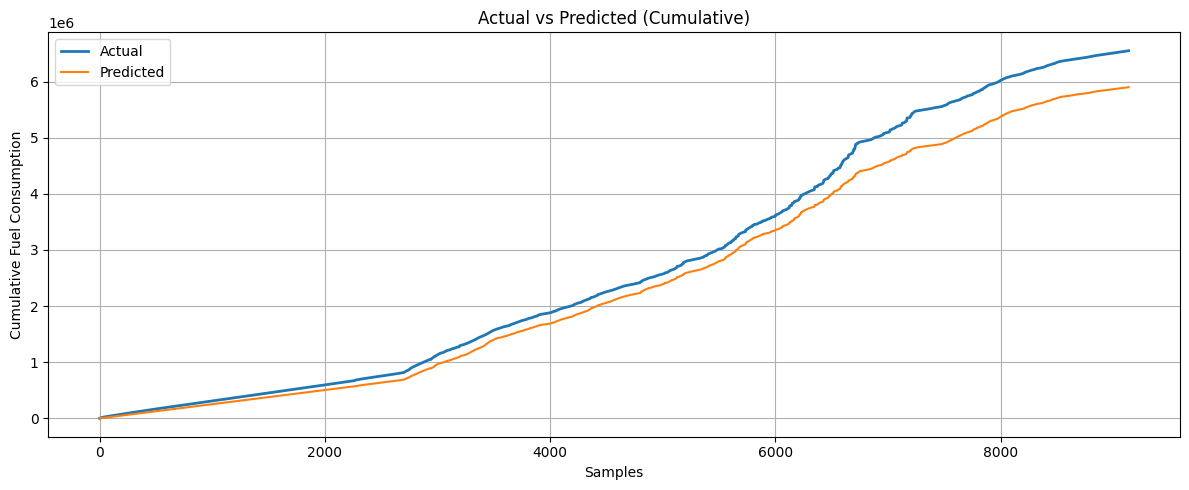

364.5209470661774
647810.625
🔄 Processing: trip_40.0_part_1_6.csv


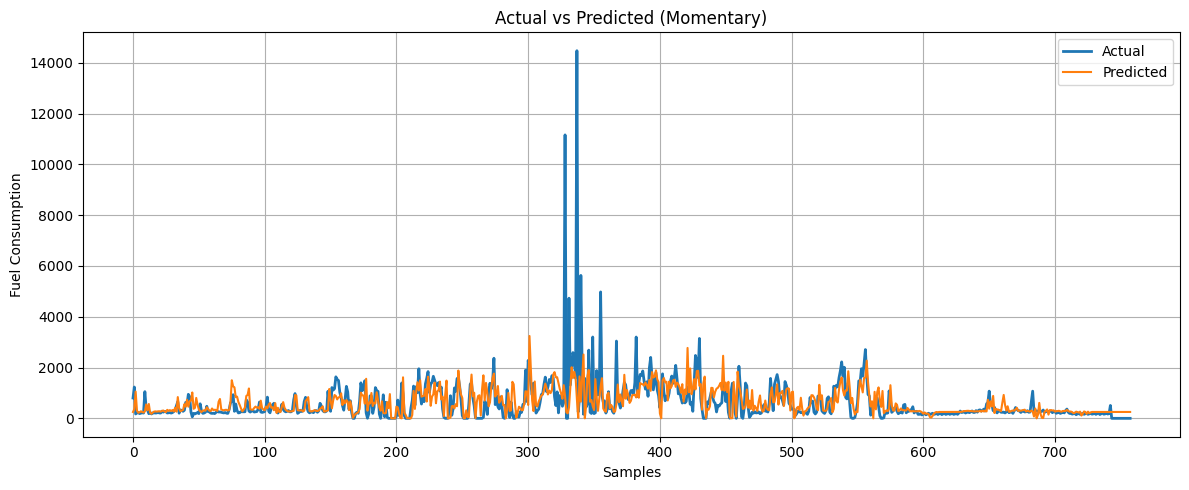

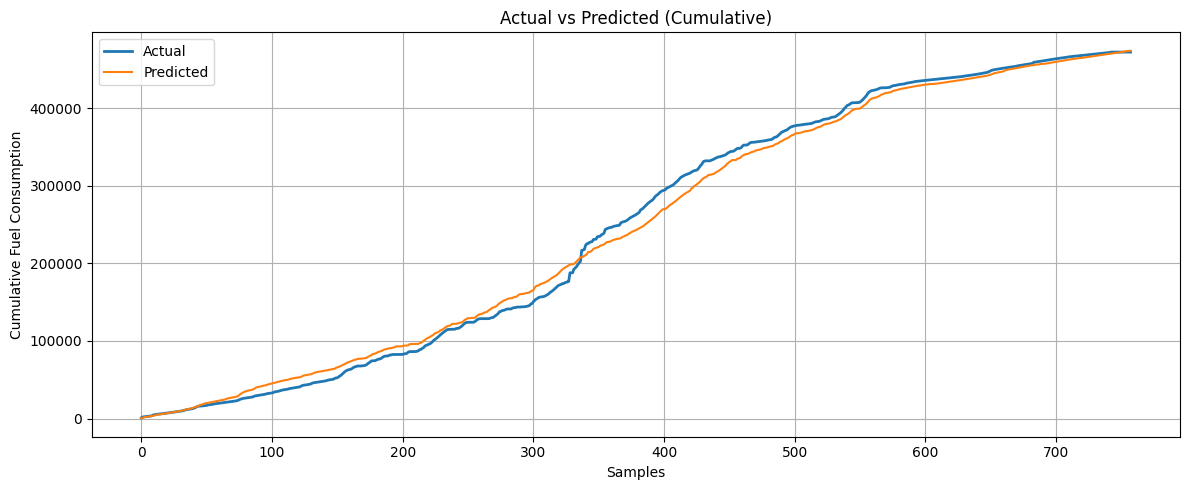

358.045115206821
1763.15625
🔄 Processing: trip_3.0_part_1_6.csv


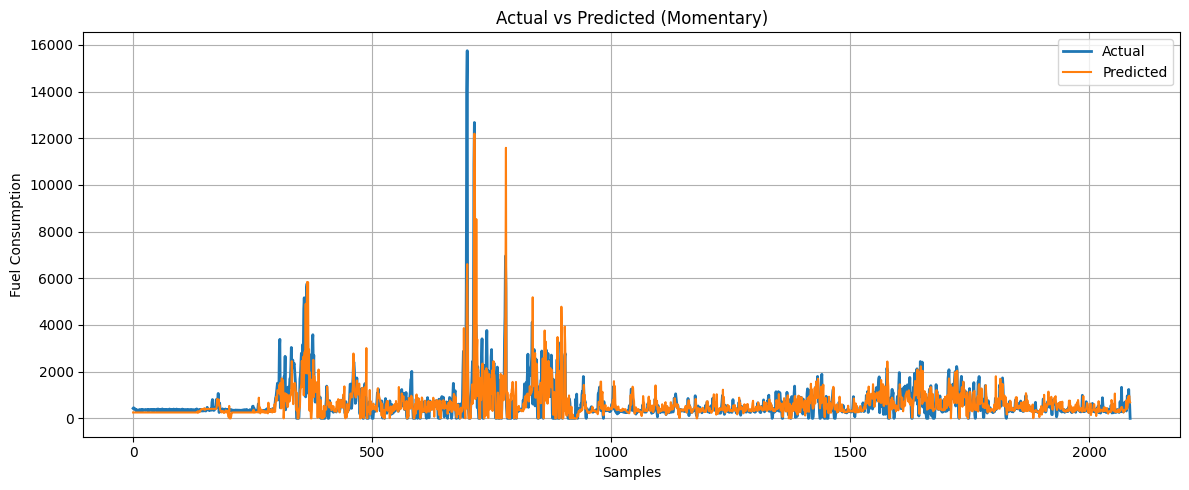

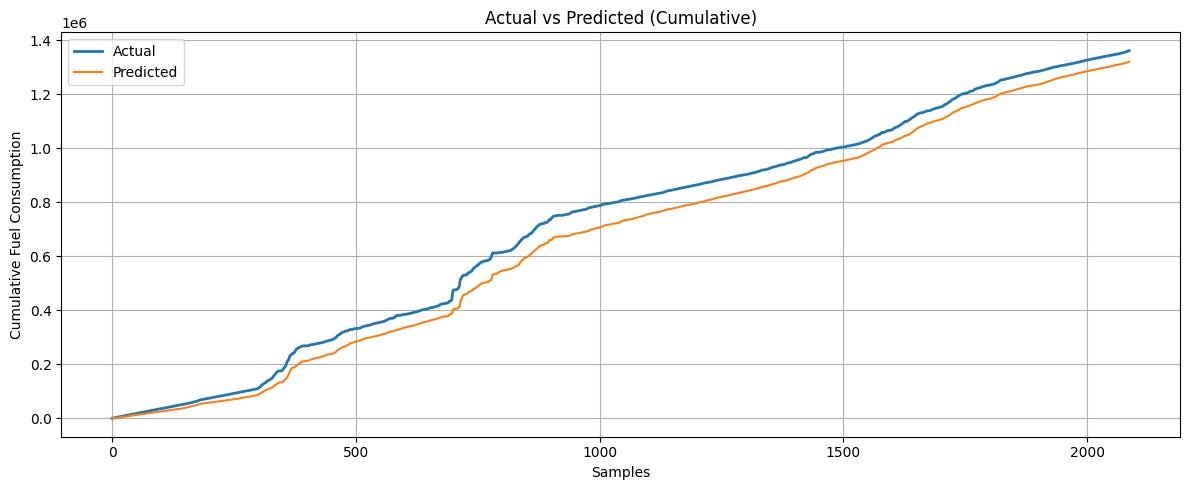

337.9506427740228
40514.73400000017
🔄 Processing: trip_57.0_part_1_6.csv


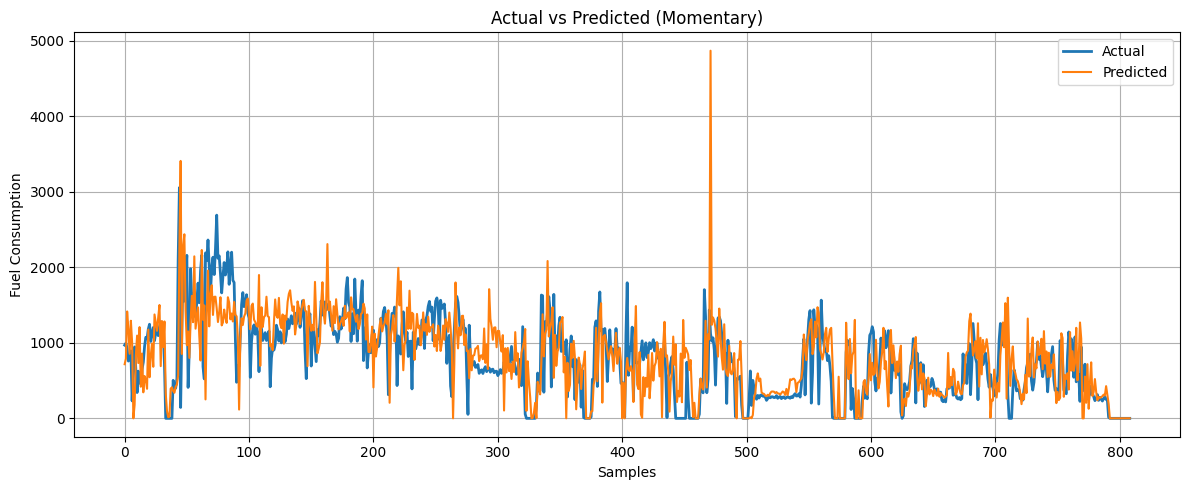

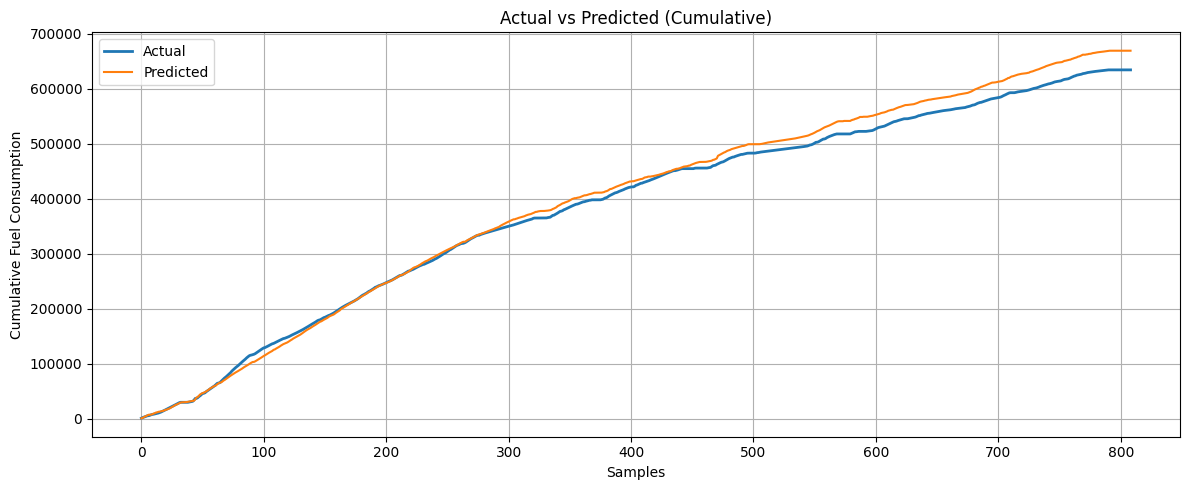

303.1499914437173
34849.29700000002
🔄 Processing: trip_65.0_part_1_6.csv


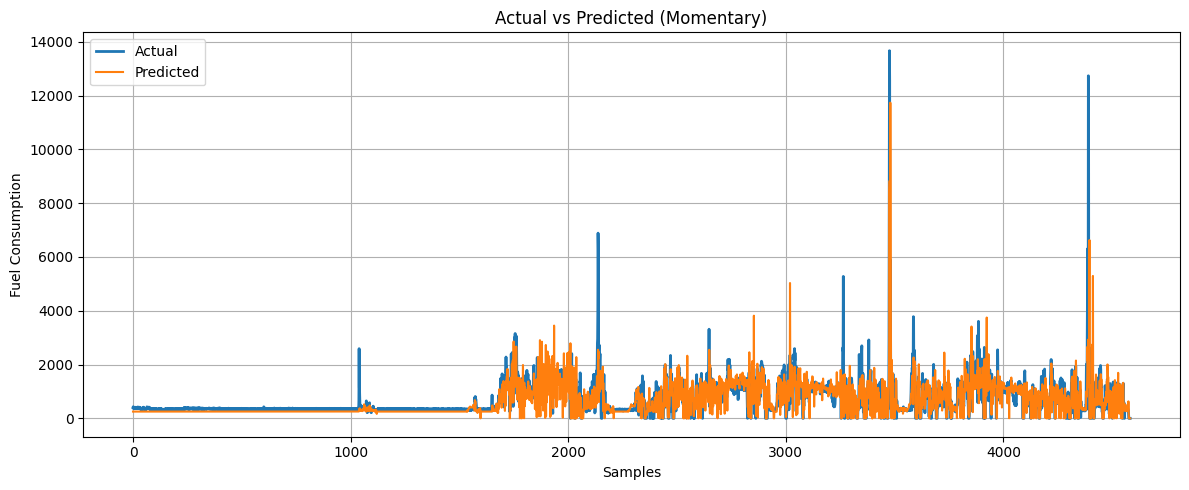

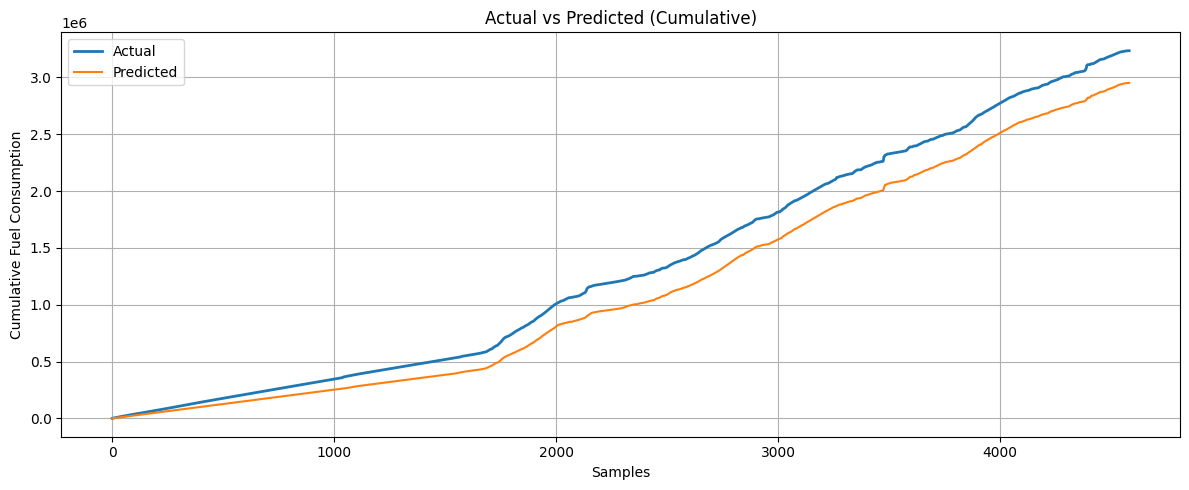

287.3139743060306
283025.2340000002
🔄 Processing: trip_72.0_part_2_6.csv


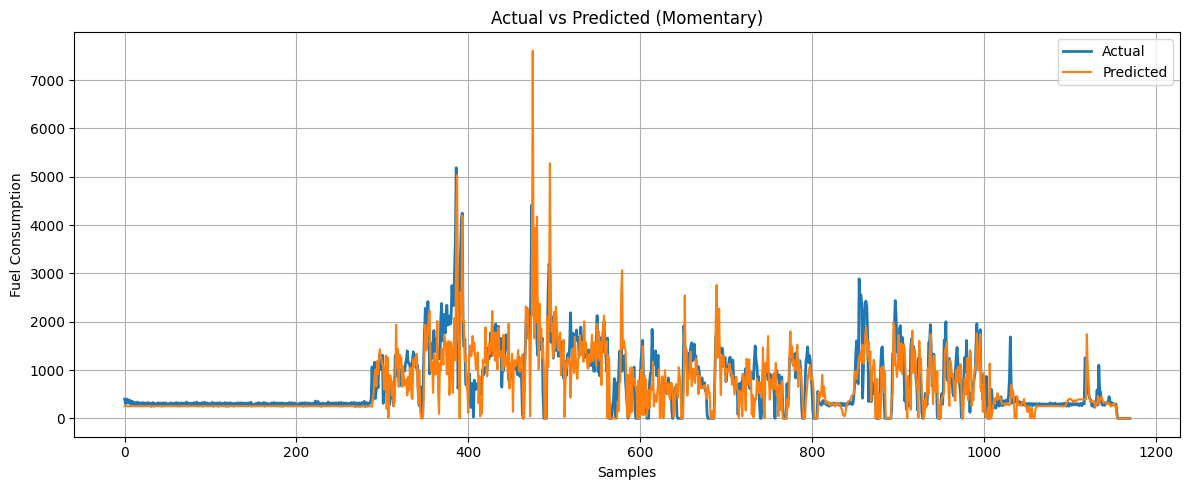

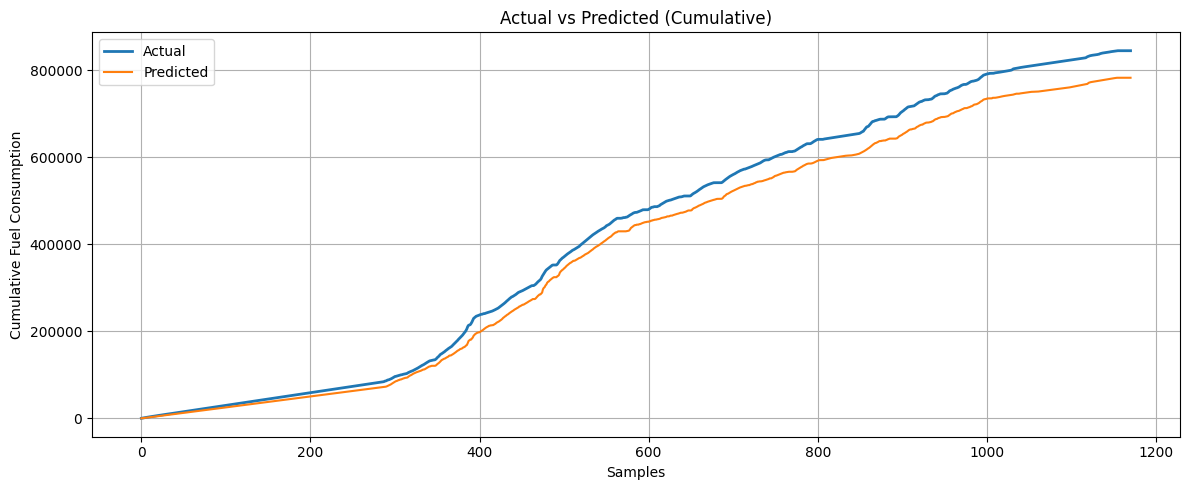

286.13965368346254
62171.10950000002
🔄 Processing: trip_20.0_part_1_6.csv


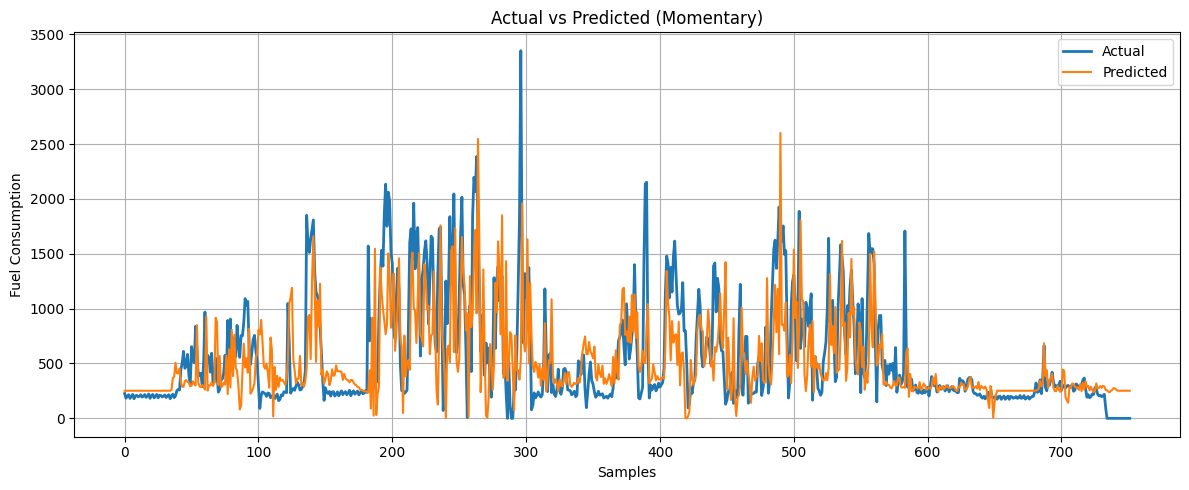

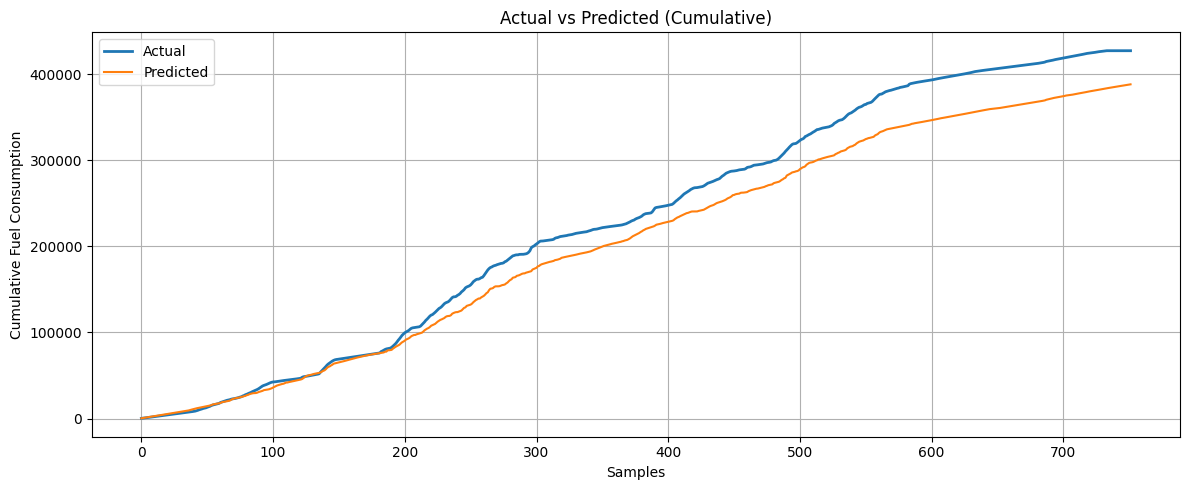

270.3473223721676
39051.78100000002
🔄 Processing: trip_16.0_part_6_6.csv


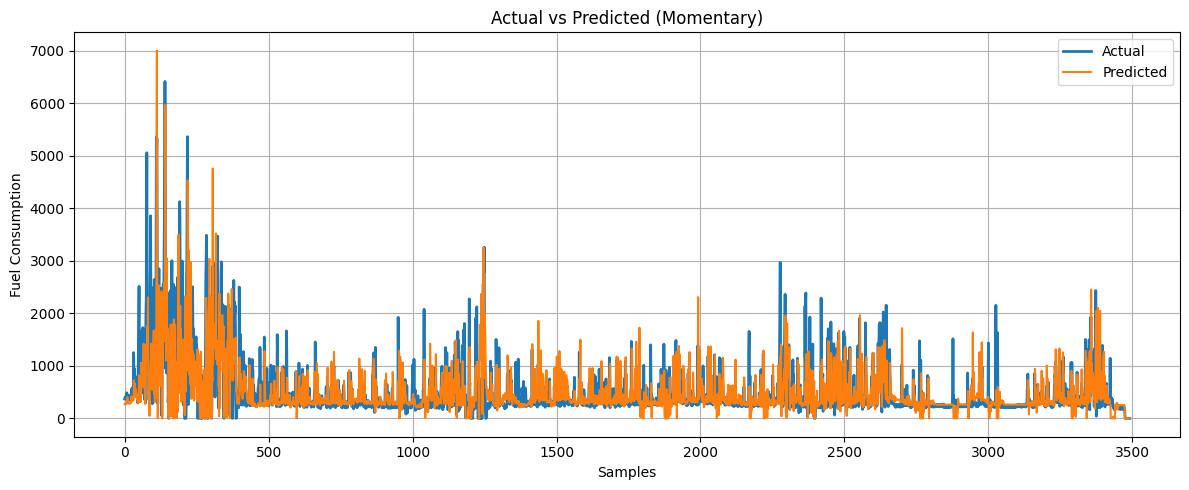

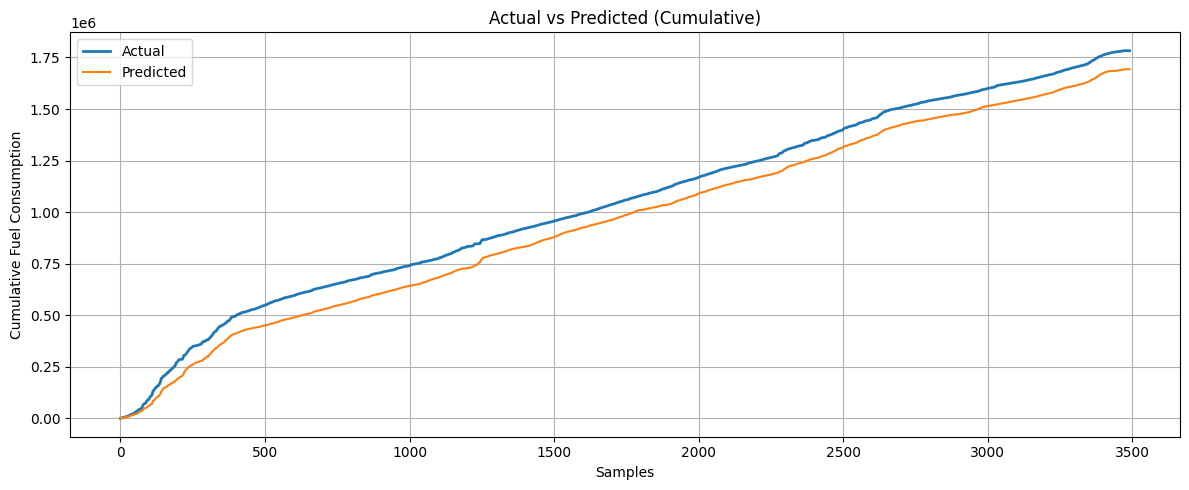

264.5907796317706
89987.14100000006
🔄 Processing: trip_56.0_part_1_6.csv


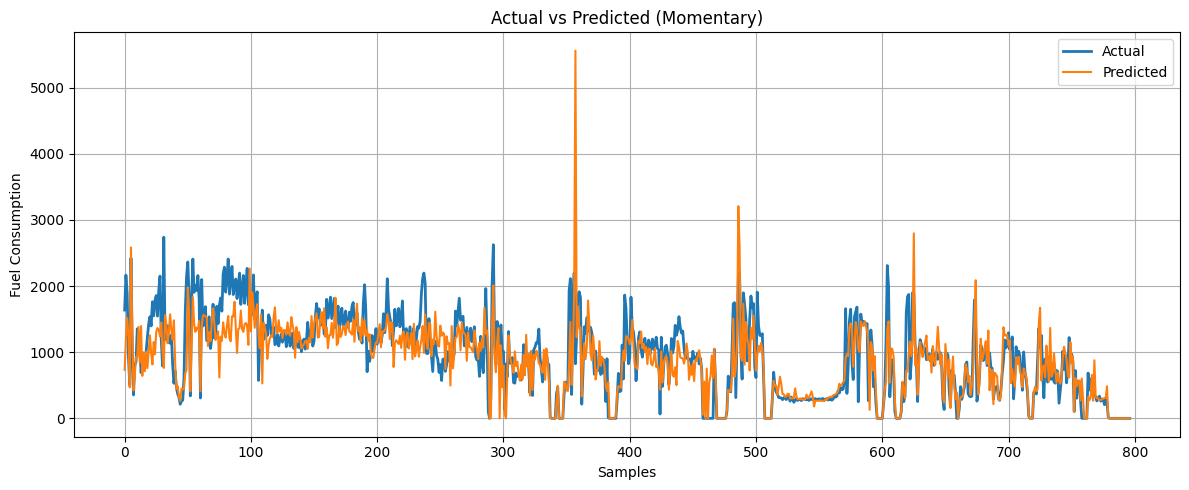

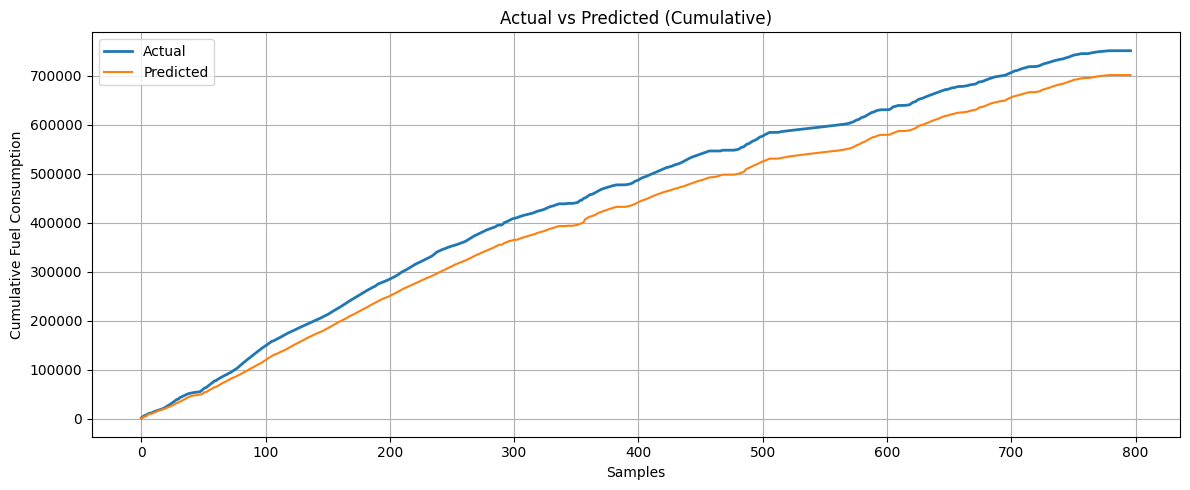

244.76582982639795
49711.812999999966
🔄 Processing: trip_19.0_part_3_6.csv


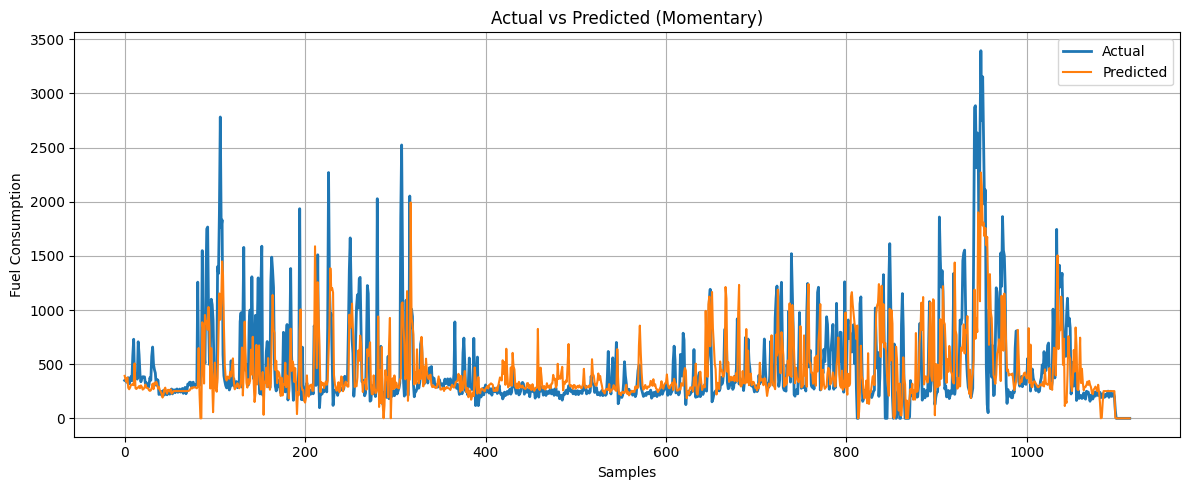

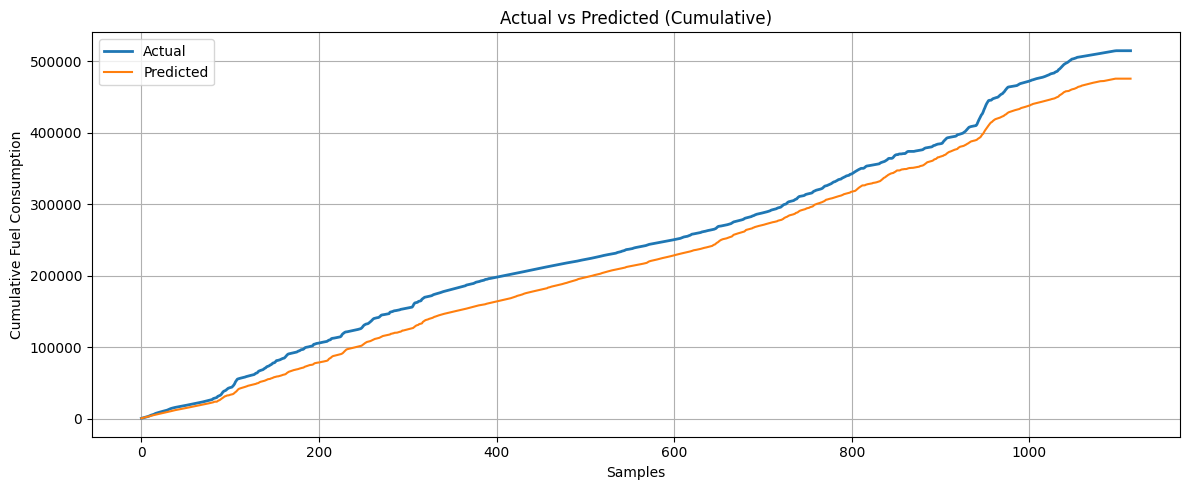

220.4980843183811
39111.124500000034
🔄 Processing: trip_101.0_part_1_6.csv


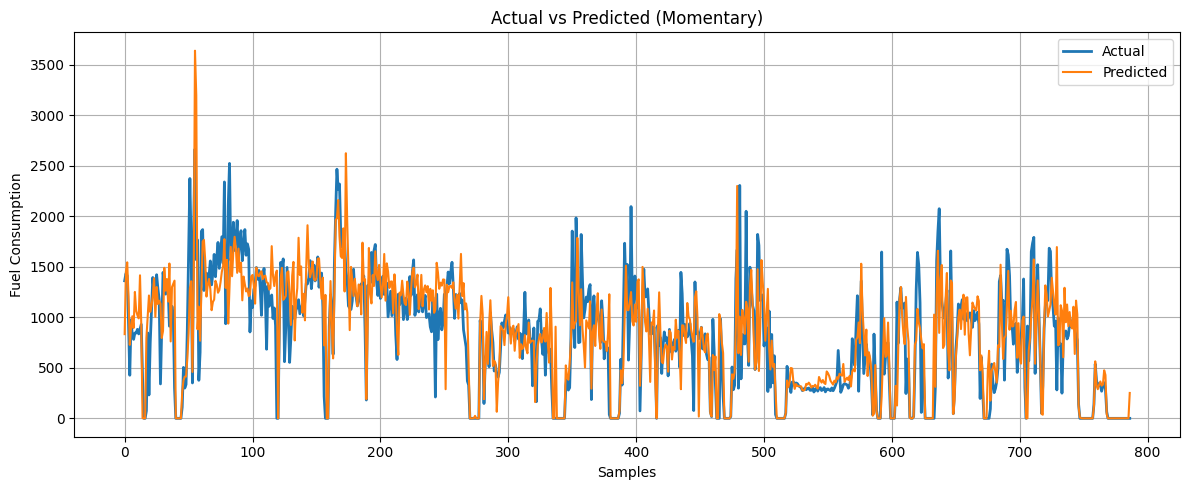

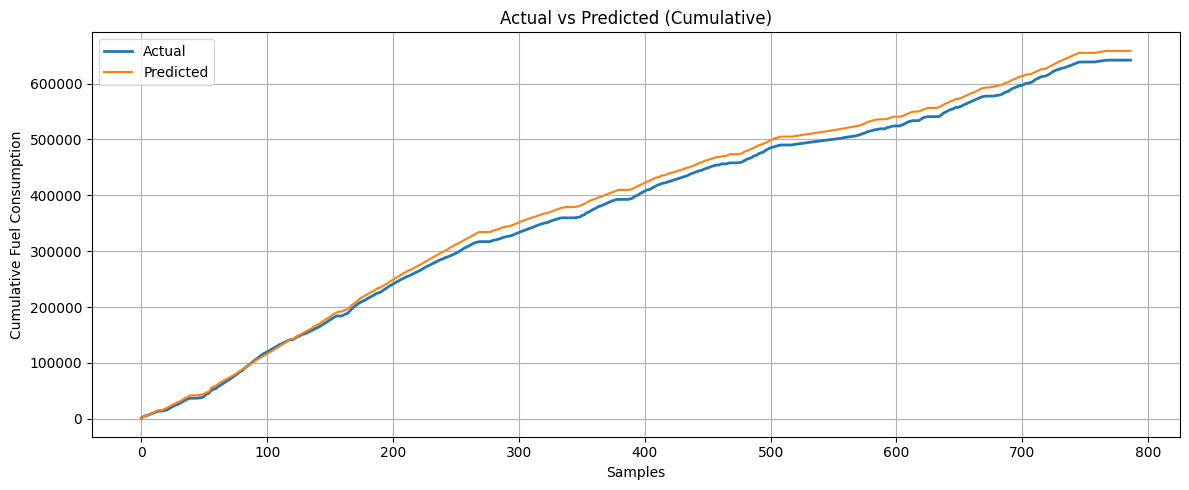

212.64865723641438
16858.90599999996
🔄 Processing: trip_108.0_part_1_6.csv


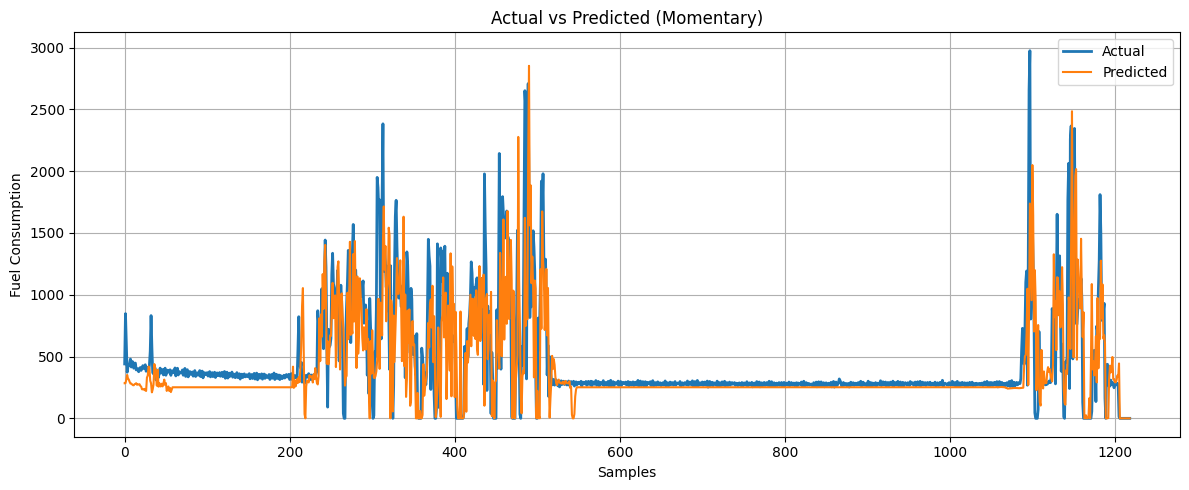

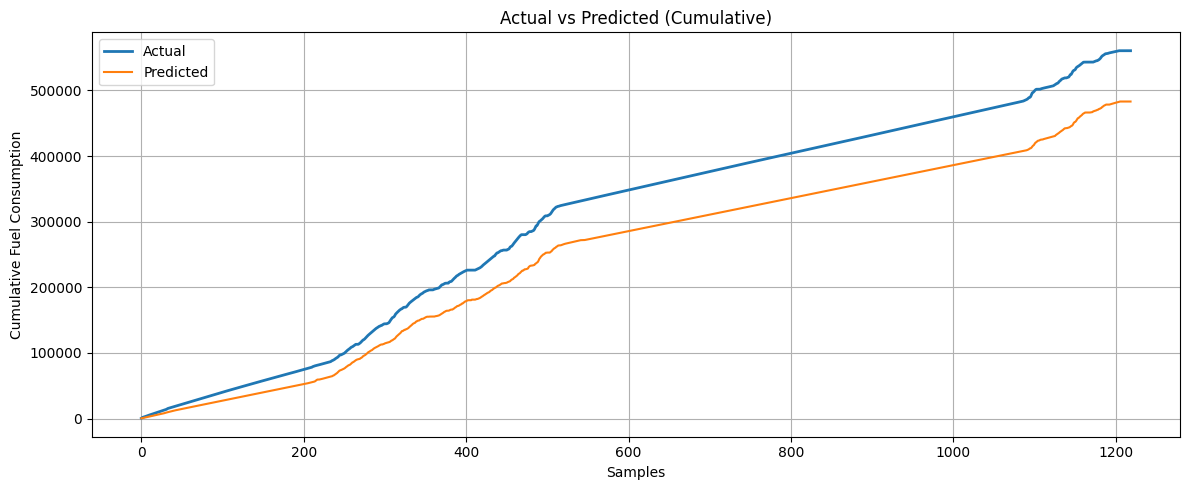

167.0931426674618
77432.81224999996
445.36, 229250.74


In [ ]:
import os
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import joblib
from sklearn.preprocessing import StandardScaler


# model = model = FuelConsumptionCNN(input_features).to(device)
# model.load_state_dict(torch.load(r'C:\Users\Rajabali\Desktop\FCP\CNN\test_results\297.13, 234965.72\fuel_consumption_cnn_model.pth', weights_only=True))

def predict_model(model, X_seq_tensor):
    with torch.no_grad():
        predictions = model(X_seq_tensor)
    return predictions.cpu().numpy().flatten()

def plot_predicted_vs_real_nodraw(filepath, model, result_dir):        
    df = pd.read_csv(filepath)
    df['Current_gear_shift_position_(Current_gear)'] = df['Current_gear_shift_position_(Current_gear)'].replace({13: 0, 14: 1})

    # Feature engineering (همانند آموزش)
    df['Acceleration1'] = df['Vehicle_Speed'].diff().fillna(0)
    df['Acceleration2'] = df['Vehicle_Speed'].diff().shift(-1).fillna(0)
    df['Jerk2'] = df['Acceleration2'].diff().shift(-1).fillna(0)

    df['Acceleration1_EWM5'] = df['Acceleration1'].ewm(span=5).mean().fillna(0)
    df['Jerk1'] = df['Acceleration1'].diff().fillna(0)
    df['Vehicle_Speed_MA5'] = df['Vehicle_Speed'].rolling(window=5).mean().bfill()
    df['Vehicle_Speed_MA100'] = df['Vehicle_Speed'].rolling(window=39).mean().bfill()
    df['Speed_t-1'] = df['Vehicle_Speed'].shift(1).bfill()
    df['Momentary fuel consumption2'] = df['Trip_fuel_consumption'].diff().shift(-1).fillna(0)
    df['Momentary fuel consumption2'] = np.log1p(df['Momentary fuel consumption2'])
    df['new_slope'] = df['new_slope'].bfill()
    df['new_slope'] = df['new_slope'].ffill()


    df['Momentary fuel consumption2_MA5'] = df['Momentary fuel consumption2'].rolling(window=5).mean().fillna(0)
    df['Momentary fuel consumption2_MA10'] = df['Momentary fuel consumption2'].rolling(window=10).mean().fillna(0)
    df['Momentary fuel consumption2_MA15'] = df['Momentary fuel consumption2'].rolling(window=15).mean().fillna(0)
    df['Momentary fuel consumption2_MA20'] = df['Momentary fuel consumption2'].rolling(window=20).mean().fillna(0)

    df['Vehicle_Speed_ewm5'] = df['Vehicle_Speed'].ewm(span=5).mean().fillna(0)
    df['Vehicle_Speed_ewm10'] = df['Vehicle_Speed'].ewm(span=10).mean().fillna(0)
    df['Vehicle_Speed_ewm15'] = df['Vehicle_Speed'].ewm(span=15).mean().fillna(0)
    df['Vehicle_Speed_ewm40'] = df['Vehicle_Speed'].ewm(span=20).mean().fillna(0)
    df['Modified_Speed'] = np.power(df['Vehicle_Speed'], 1)
    if filepath == 'test/Real_NEDC_testroom.csv':
        print(df[features].describe())
    # ساخت ورودی مد
    X = scaler_X.transform(df[features].values)
    y = df[target].values

    # ساخت دنباله‌های ورودی و خروجی
    X_seq = []
    y_seq = []
    
    for i in range(len(X) - sequence_length):
        X_seq.append(X[i:i + sequence_length])
        if sequence_length % 2 != 0:
            y_seq.append(y[i + sequence_length//2])
        else:
            y_seq.append((y[i + sequence_length//2] + y[i - 1 + sequence_length//2])/2)


    X_seq_tensor = torch.tensor(X_seq, dtype=torch.float32).to(device)
    y_seq = np.array(y_seq)

    # پیش‌بینی
    y_pred = predict_model(model, X_seq_tensor)
    y_pred = scaler_y.inverse_transform(y_pred.reshape(-1, 1))
    y_pred[y_pred < 0] = 0
    y_pred = y_pred.reshape(1, -1)[0]
    y_pred = np.expm1(y_pred)
    y_seq = y_seq.flatten()
    y_seq = np.expm1(y_seq)
    # محاسبه تجمعی
    sumpred = np.cumsum(y_pred)
    sumact = np.cumsum(y_seq)

    result_df = pd.DataFrame({
        'Actual': y_seq,
        'Predicted': y_pred,
        'Sum_Actual': sumact,
        'Sum_Predicted': sumpred
    })
    mae = np.mean(np.abs(result_df['Actual'] - result_df['Predicted']))
    cumsume = np.abs(result_df['Sum_Actual'].iloc[-1] - result_df['Sum_Predicted'].iloc[-1])

    # ذخیره نتایج
    os.makedirs(result_dir, exist_ok=True)
    csv_filename = os.path.join(result_dir, f'{os.path.splitext(os.path.basename(filepath))[0]}_cnn_result.csv')
    result_df.to_csv(csv_filename, index=False)

    # رسم نمودار لحظه‌ای
    # plt.figure(figsize=(12, 5))
    # plt.plot(y_seq, label='Actual', linewidth=2)
    # plt.plot(y_pred, label='Predicted')
    # plt.xlabel('Samples')
    # plt.ylabel('Fuel Consumption')
    # plt.title('Actual vs Predicted (Momentary)')
    # plt.legend()
    # plt.grid(True)
    # plt.tight_layout()
    # plt.savefig(os.path.join(result_dir, f'{os.path.splitext(os.path.basename(filepath))[0]}_moment.png'))
    # plt.show()
    # plt.close()

    # # نمودار تجمعی
    # plt.figure(figsize=(12, 5))
    # plt.plot(sumact, label='Actual', linewidth=2)
    # plt.plot(sumpred, label='Predicted')
    # plt.xlabel('Samples')
    # plt.ylabel('Cumulative Fuel Consumption')
    # plt.title('Actual vs Predicted (Cumulative)')
    # plt.legend()
    # plt.grid(True)
    # plt.tight_layout()
    # plt.savefig(os.path.join(result_dir, f'{os.path.splitext(os.path.basename(filepath))[0]}_SUM.png'))
    # plt.show()
    # plt.close()
    
    return mae, cumsume, len(df)


def plot_predicted_vs_real(filepath, model, result_dir):        
    df = pd.read_csv(filepath)
    df['Current_gear_shift_position_(Current_gear)'] = df['Current_gear_shift_position_(Current_gear)'].replace({13: 0, 14: 1})

    # Feature engineering (همانند آموزش)
    df['Acceleration1'] = df['Vehicle_Speed'].diff().fillna(0)
    df['Acceleration2'] = df['Vehicle_Speed'].diff().shift(-1).fillna(0)
    df['Jerk2'] = df['Acceleration2'].diff().shift(-1).fillna(0)

    df['Acceleration1_EWM5'] = df['Acceleration1'].ewm(span=5).mean().fillna(0)
    df['Jerk1'] = df['Acceleration1'].diff().fillna(0)
    df['Vehicle_Speed_MA5'] = df['Vehicle_Speed'].rolling(window=5).mean().bfill()
    df['Vehicle_Speed_MA100'] = df['Vehicle_Speed'].rolling(window=39).mean().bfill()
    df['Speed_t-1'] = df['Vehicle_Speed'].shift(1).bfill()
    df['Momentary fuel consumption2'] = df['Trip_fuel_consumption'].diff().shift(-1).fillna(0)
    df['Momentary fuel consumption2'] = np.log1p(df['Momentary fuel consumption2'])
    df['new_slope'] = df['new_slope'].bfill()
    df['new_slope'] = df['new_slope'].ffill()


    df['Momentary fuel consumption2_MA5'] = df['Momentary fuel consumption2'].rolling(window=5).mean().fillna(0)
    df['Momentary fuel consumption2_MA10'] = df['Momentary fuel consumption2'].rolling(window=10).mean().fillna(0)
    df['Momentary fuel consumption2_MA15'] = df['Momentary fuel consumption2'].rolling(window=15).mean().fillna(0)
    df['Momentary fuel consumption2_MA20'] = df['Momentary fuel consumption2'].rolling(window=20).mean().fillna(0)

    df['Vehicle_Speed_ewm5'] = df['Vehicle_Speed'].ewm(span=5).mean().fillna(0)
    df['Vehicle_Speed_ewm10'] = df['Vehicle_Speed'].ewm(span=10).mean().fillna(0)
    df['Vehicle_Speed_ewm15'] = df['Vehicle_Speed'].ewm(span=15).mean().fillna(0)
    df['Vehicle_Speed_ewm40'] = df['Vehicle_Speed'].ewm(span=20).mean().fillna(0)
    df['Modified_Speed'] = np.power(df['Vehicle_Speed'], 1)
    # ساخت ورودی مد
    X = scaler_X.transform(df[features].values)
    y = df[target].values

    # ساخت دنباله‌های ورودی و خروجی
    X_seq = []
    y_seq = []
    
    for i in range(len(X) - sequence_length):
        X_seq.append(X[i:i + sequence_length])
        if sequence_length % 2 != 0:
            y_seq.append(y[i + sequence_length//2])
        else:
            y_seq.append((y[i + sequence_length//2] + y[i - 1 + sequence_length//2])/2)


    X_seq_tensor = torch.tensor(X_seq, dtype=torch.float32).to(device)
    y_seq = np.array(y_seq)

    # پیش‌بینی
    y_pred = predict_model(model, X_seq_tensor)
    y_pred = scaler_y.inverse_transform(y_pred.reshape(-1, 1))
    y_pred[y_pred < 0] = 0
    y_pred = y_pred.reshape(1, -1)[0]
    y_pred = np.expm1(y_pred)
    y_seq = y_seq.flatten()
    y_seq = np.expm1(y_seq)
    # محاسبه تجمعی
    sumpred = np.cumsum(y_pred)
    sumact = np.cumsum(y_seq)

    result_df = pd.DataFrame({
        'Actual': y_seq,
        'Predicted': y_pred,
        'Sum_Actual': sumact,
        'Sum_Predicted': sumpred
    })
    mae = np.mean(np.abs(result_df['Actual'] - result_df['Predicted']))
    cumsume = np.abs(result_df['Sum_Actual'].iloc[-1] - result_df['Sum_Predicted'].iloc[-1])

    # ذخیره نتایج
    os.makedirs(result_dir, exist_ok=True)
    csv_filename = os.path.join(result_dir, f'{os.path.splitext(os.path.basename(filepath))[0]}_cnn_result.csv')
    result_df.to_csv(csv_filename, index=False)

    # رسم نمودار لحظه‌ای
    plt.figure(figsize=(12, 5))
    plt.plot(y_seq, label='Actual', linewidth=2)
    plt.plot(y_pred, label='Predicted')
    plt.xlabel('Samples')
    plt.ylabel('Fuel Consumption')
    plt.title('Actual vs Predicted (Momentary)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(os.path.join(result_dir, f'{os.path.splitext(os.path.basename(filepath))[0]}_moment.png'))
    plt.show()
    plt.close()

    # نمودار تجمعی
    plt.figure(figsize=(12, 5))
    plt.plot(sumact, label='Actual', linewidth=2)
    plt.plot(sumpred, label='Predicted')
    plt.xlabel('Samples')
    plt.ylabel('Cumulative Fuel Consumption')
    plt.title('Actual vs Predicted (Cumulative)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(os.path.join(result_dir, f'{os.path.splitext(os.path.basename(filepath))[0]}_SUM.png'))
    plt.show()
    plt.close()
    
    return mae, cumsume, len(df)

# ---------------- اجرای روی همه فایل‌های CSV ----------------
def process_all_csvs_in_directory(csv_dir, model, result_dir):
    csv_files = [f for f in os.listdir(csv_dir) if f.endswith('.csv')]
    maes = []
    sumes = []
    total = 0
    loss_df = pd.DataFrame(columns=['file', 'error'])

    for csv_file in csv_files:
        if csv_file == 'combined.csv':
            continue
        csv_path = os.path.join(csv_dir, csv_file)
        print(f"🔄 Processing: {csv_file}")
        mae, cumsume, l = plot_predicted_vs_real_nodraw(csv_path, model, result_dir)
        loss_df.loc[len(loss_df)] = [csv_file, mae]
        total += l
        
        maes.append(mae * l)
        sumes.append(cumsume)
    
    loss_df = loss_df.sort_values(['error'], ascending=False)
    print(loss_df)
    
    for csv_file in loss_df['file']:
        csv_path = os.path.join(csv_dir, csv_file)
        print(f"🔄 Processing: {csv_file}")
        mae, cumsume, l = plot_predicted_vs_real(csv_path, model, result_dir)
        print(mae)
        print(cumsume)
        
        
    mae = np.sum(maes)/total
    sume = np.mean(sumes)
    
    model_file = open(f'{result_dir}/model.txt', 'w')
    model_file.write(str(sequence_length) + '\n')
    model_file.write(str(model))
    model_file.close()
    
    feature_file = open(f'{result_dir}/features.txt', 'w')
    feature_file.write(str(features))
    feature_file.close()
    
    os.rename(result_dir, f'test_results\{np.round(mae, decimals=2)}, {np.round(sume, decimals=2)}')
    print(f'{np.round(mae, decimals=2)}, {np.round(sume, decimals=2)}')
# مسیر فایل‌های تست
csv_dir = 'test/'
folder = r'test_results\folder_name'
process_all_csvs_in_directory(csv_dir, model, folder)